## ISYE 6402, Module 4 - Forecasting Chattahoochee River Flow

### Chattahoochee River Flow: Exploratory Analysis

**River Flow Forecasting**

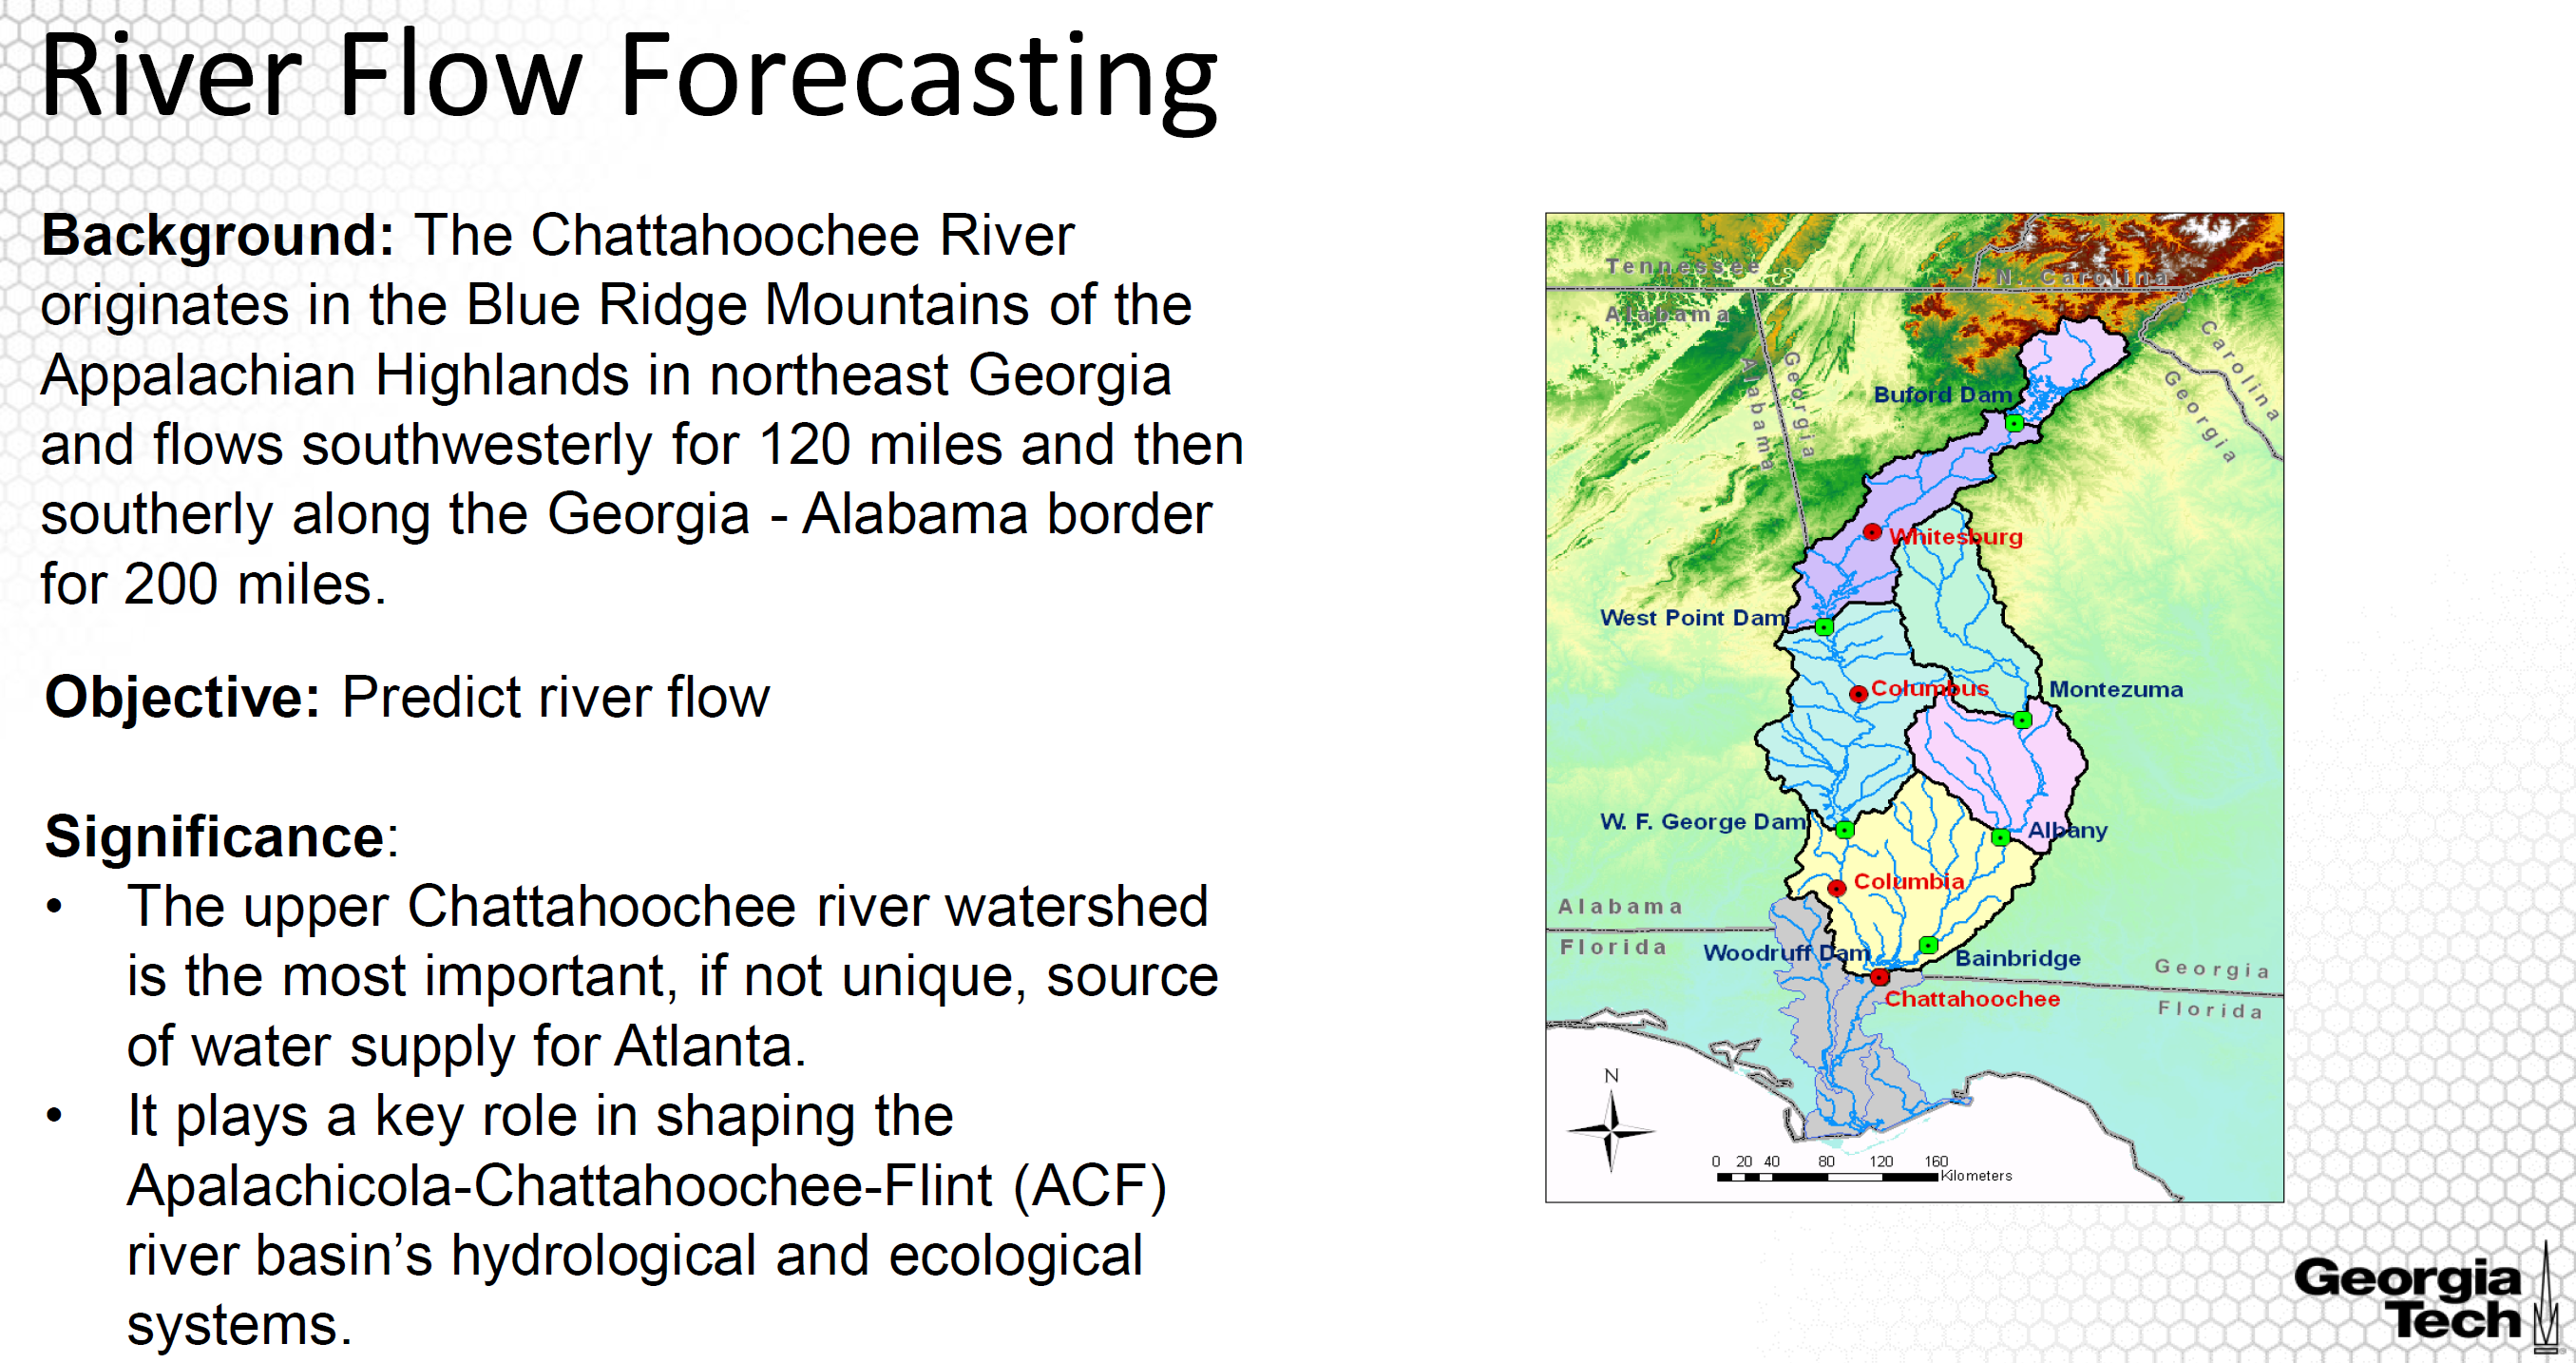


In this study, we will forecast the flow of the Chattahoochee River, which is part of an important hydrological system in southeast of the United States. The Chattahoochee River originates in the Blue Ridge Mountains of the Appalachian Highlands in northeast Georgia and flows southwest for 120 miles and then south along the Georgia - Alabama border for 200 miles. The upper Chattahoochee river watershed is the most important, if not unique, source of water supply for Atlanta Metropolitan area.  Our understanding of such environmental systems can be substantially improved by using multivariate time series analysis and modeling techniques.

- Three main time series, namely precipitation, ground air temperature and stream flow, are used in this study, where the primary objective is to forecast the stream flow. 
- For this study, temperature and rainfall data were acquired from National Weather Service Forecast Office, and the river flow measured by the discharge in cubic feet per second for the downstream site of Buford Dam was acquired from the US Geological Survey, Water Resources database. 
- For this example, the data available from the two sources were observed from 1956 to 2016.


**Multivariate Time Series Plot**

The R code for this data analysis is provided in this module. I am not going over the data processing. On this slide I am providing the code for converting the vectors of observations into time series using the ts() R command, specifying freq=12 since the data are observed monthly. Last we plot the time series and their auto and cross-correlation plots.

In [1]:
temp <- read.csv("Temperature-2.csv",header=T)
rain <- Precipitation <- read.csv("Precipitation-3.csv",header=T)
river<- read.csv("RiverFlow-2.csv", header=FALSE)

#temp = read.csv("Temperature.csv",header=T)
#rain  = read.csv("Precipitation.csv",header=T)
#river = read.csv("RiverFlow.csv",header=F)

head(temp, 3)
head(rain, 3)
head(river, 3)

Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sept Oct  Nov  Dec 
1 1956 41.5 51.1 53.9 61.0 72.4 76.8 79.3 80.3 72.0 64.8 50.4 54.3
2 1957 45.9 54.6 51.5 64.3 70.7 77.8 79.0 79.5 73.3 58.4 53.7 46.7
3 1958 38.9 37.7 49.8 62.3 70.7 77.0 78.7 78.9 74.0 62.0 56.5 42.7

Year Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sept Oct  Nov  Dec 
1 1956 1.88 6.57 5.93 5.18 2.60 2.21 7.26 1.10 6.19 2.00 1.55 3.12
2 1957 5.35 1.91 4.69 6.04 3.40 3.06 3.16 3.52 5.30 2.69 6.70 3.05
3 1958 3.88 5.91 5.19 4.50 4.11 4.09 8.85 3.56 3.14 1.69 2.14 2.58

V1   V2 V3   
1 1956 1  706.2
2 1956 2  626.8
3 1956 3  619.0

In [2]:
## remove first column (years) and transpose
temp = t(temp[,-1])
temp = as.numeric(as.vector(temp))

rain = t(rain[,-1])
#Fill in missing value in rain for October, 1964
rain[10,8]=0.5*(rain[9,8]+rain[11,8])
rain = as.numeric(as.vector(rain))

river = as.vector(river[,3])

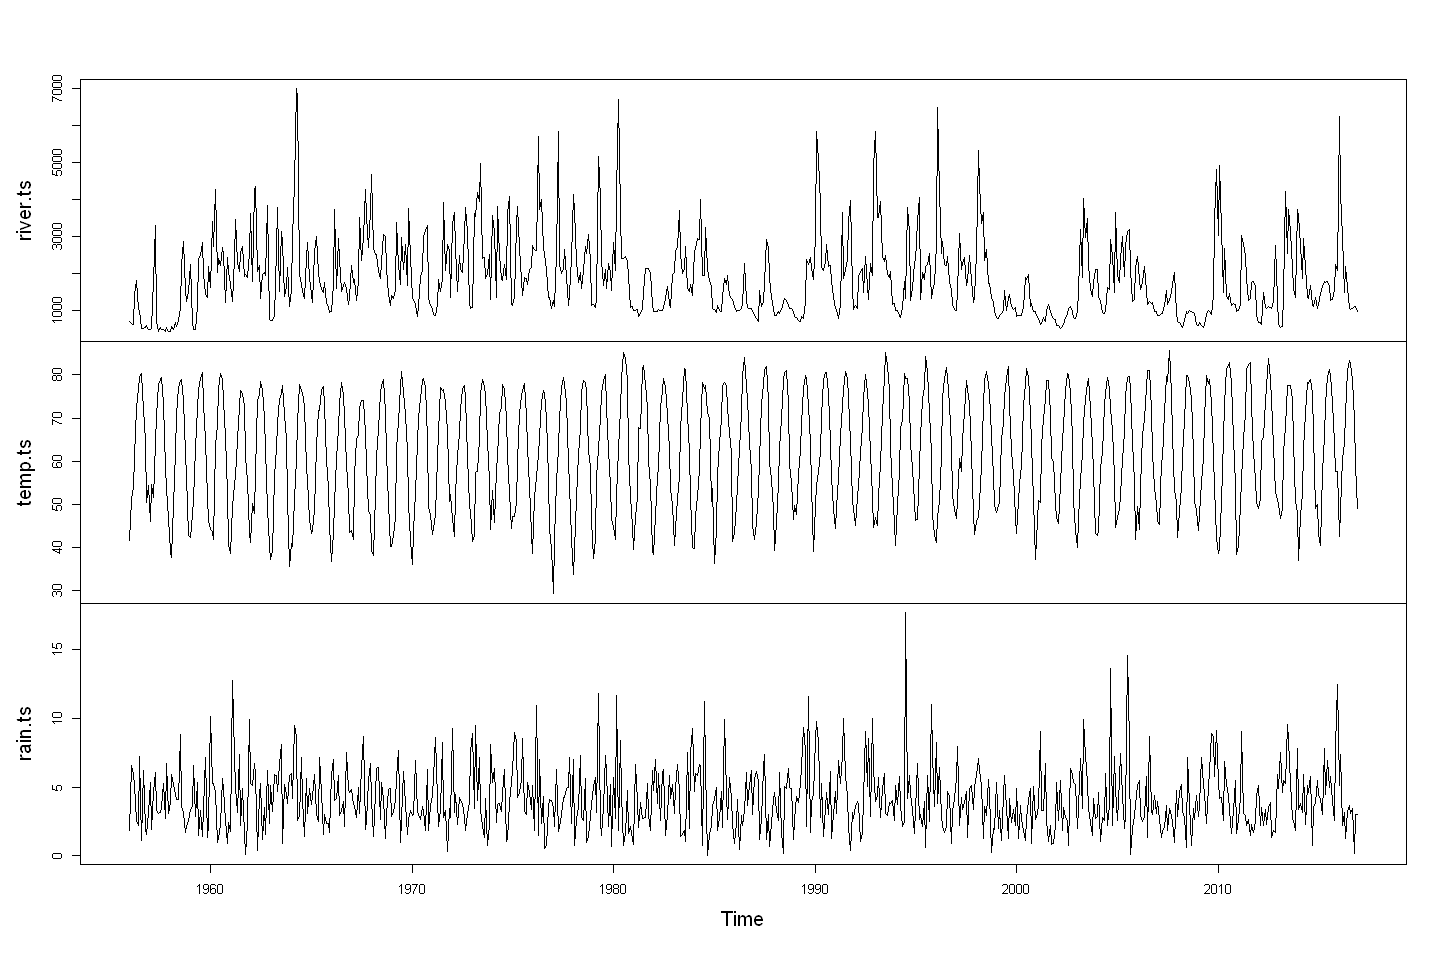

In [3]:
## Convert into multivariate time series
temp.ts <- ts(temp,start=1956, freq=12)
rain.ts <- ts(rain,start=1956, freq=12)
river.ts <- ts(river,start=1956, freq=12)

data.ts = ts.union(river.ts,temp.ts,rain.ts)

## Plot the MVTS
options(repr.plot.width=12, repr.plot.height=8)
plot(data.ts, type="l",main="")

The slide presents the time series plots for the three time series. 
- The temperature time series clearly shows seasonality. 
- The seasonal changes in rainfall are not significant even though there are visibly higher amounts of rainfall during winter months; this reflects more of a cyclical pattern than seasonality. 
- More important is the relationship of temperature and rainfall to the river flow. The air temperature shows that the potential evapotranspiration during summer months is nearly four times higher than that during winter months. 
- Thus, the stream flow time series exhibits seasonal patterns related to this variation. During winter months, when the potential evapotranspiration is lowest in the year, the stream flows are mainly determined by the precipitation. While during summer months, when the potential evapotranspiration is higher than the amount of water falling within the watershed, the stream flows are consistently low despite of the variations of precipitation. 
- Last, I will note that it seems that the river flow time series to present **non-constant variability over time**.


**Stationarity: ACF Plots**

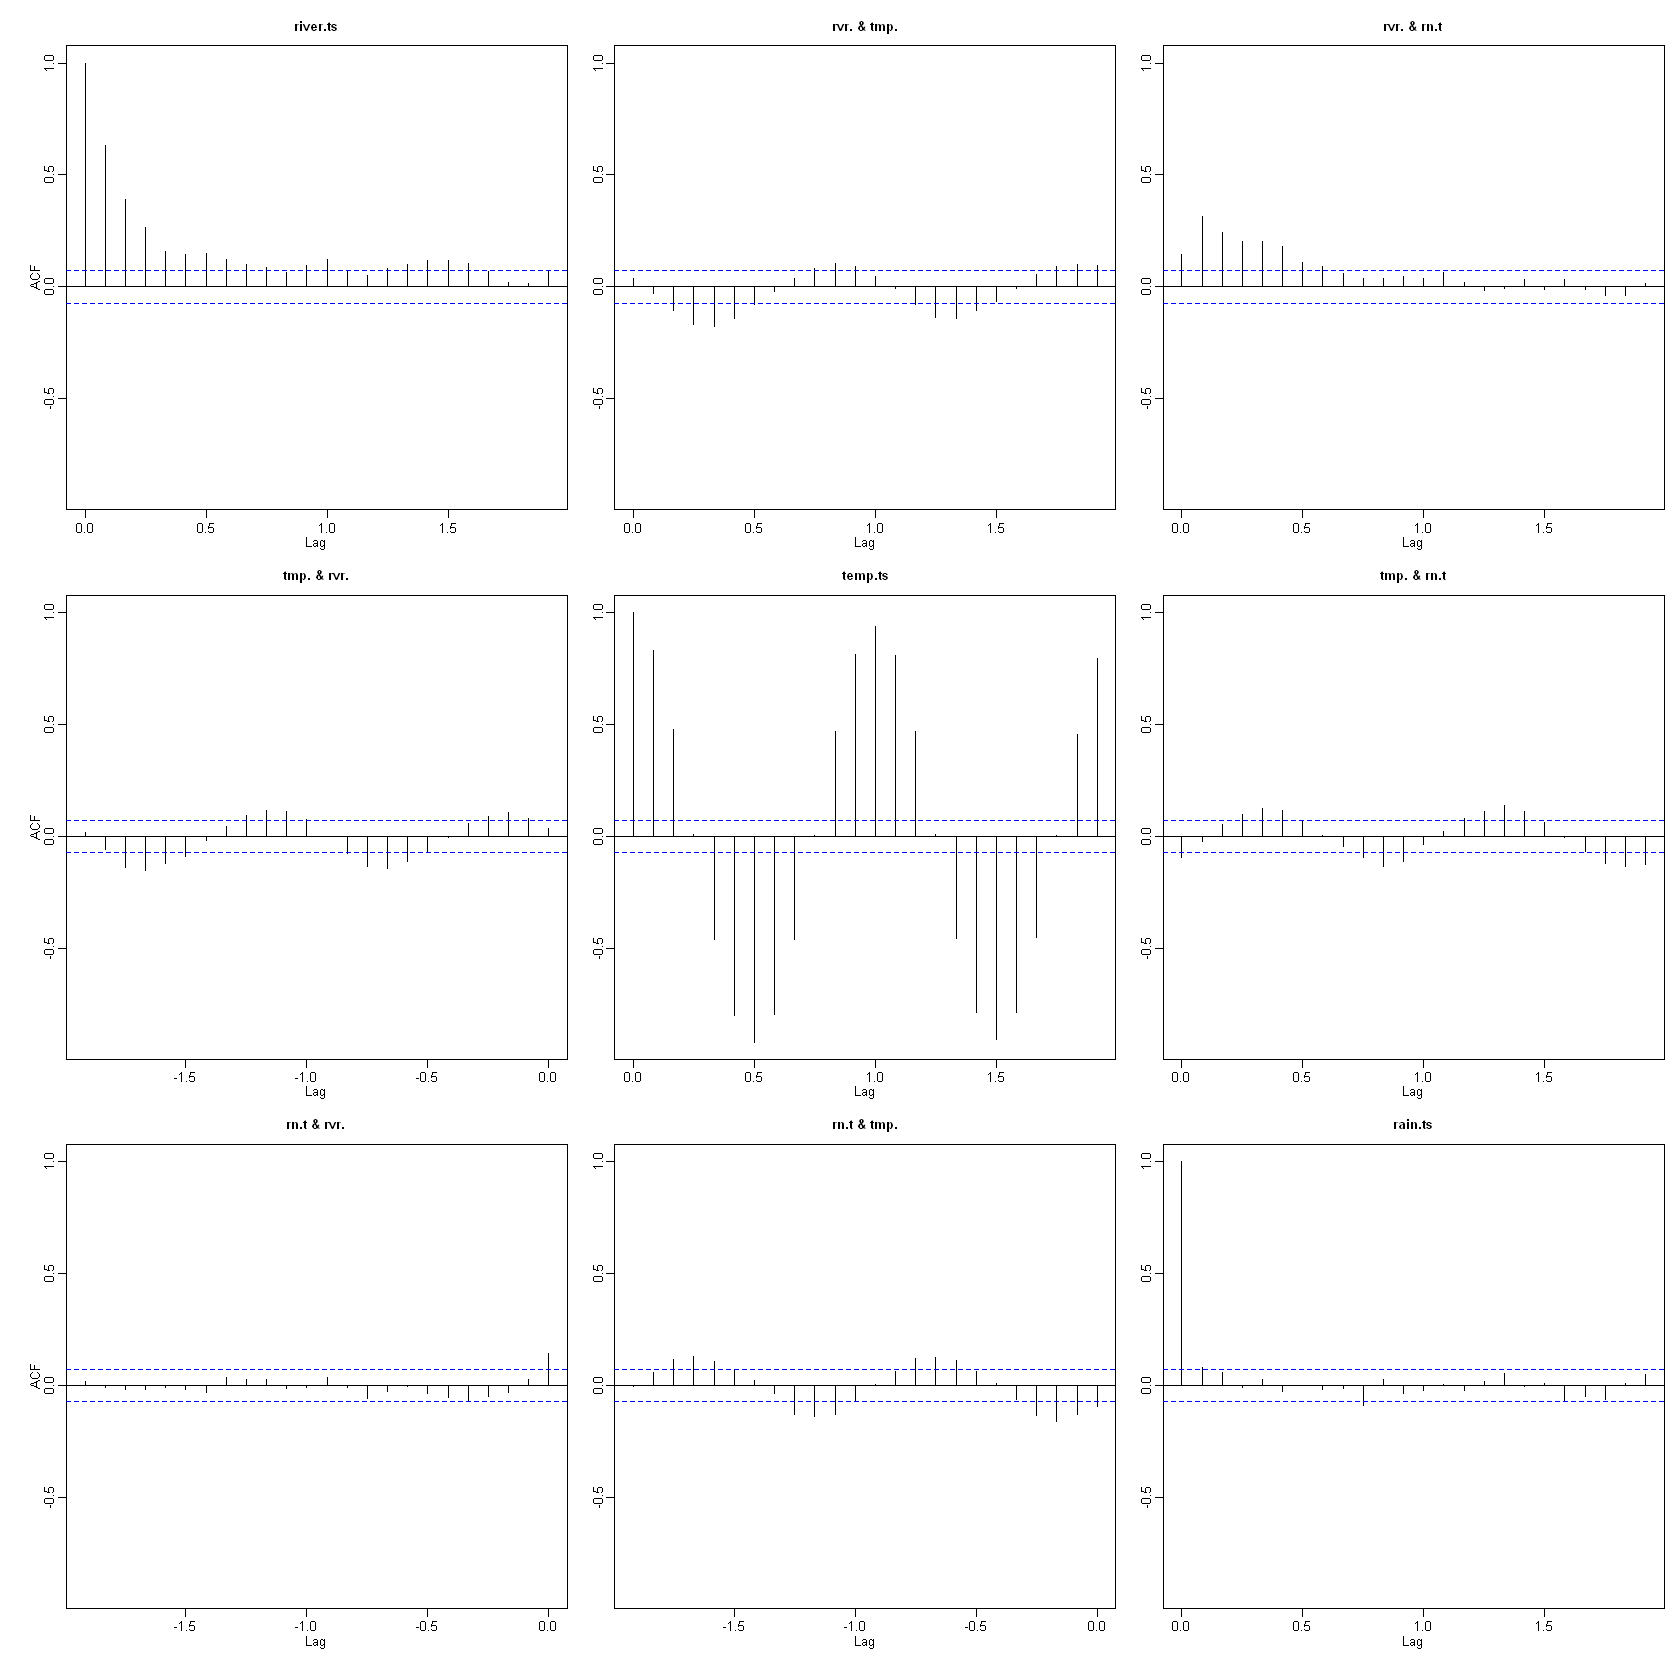

In [4]:
options(repr.plot.width=14, repr.plot.height=14)
acf(data.ts, mar=c(3.5,3,1.9,0))

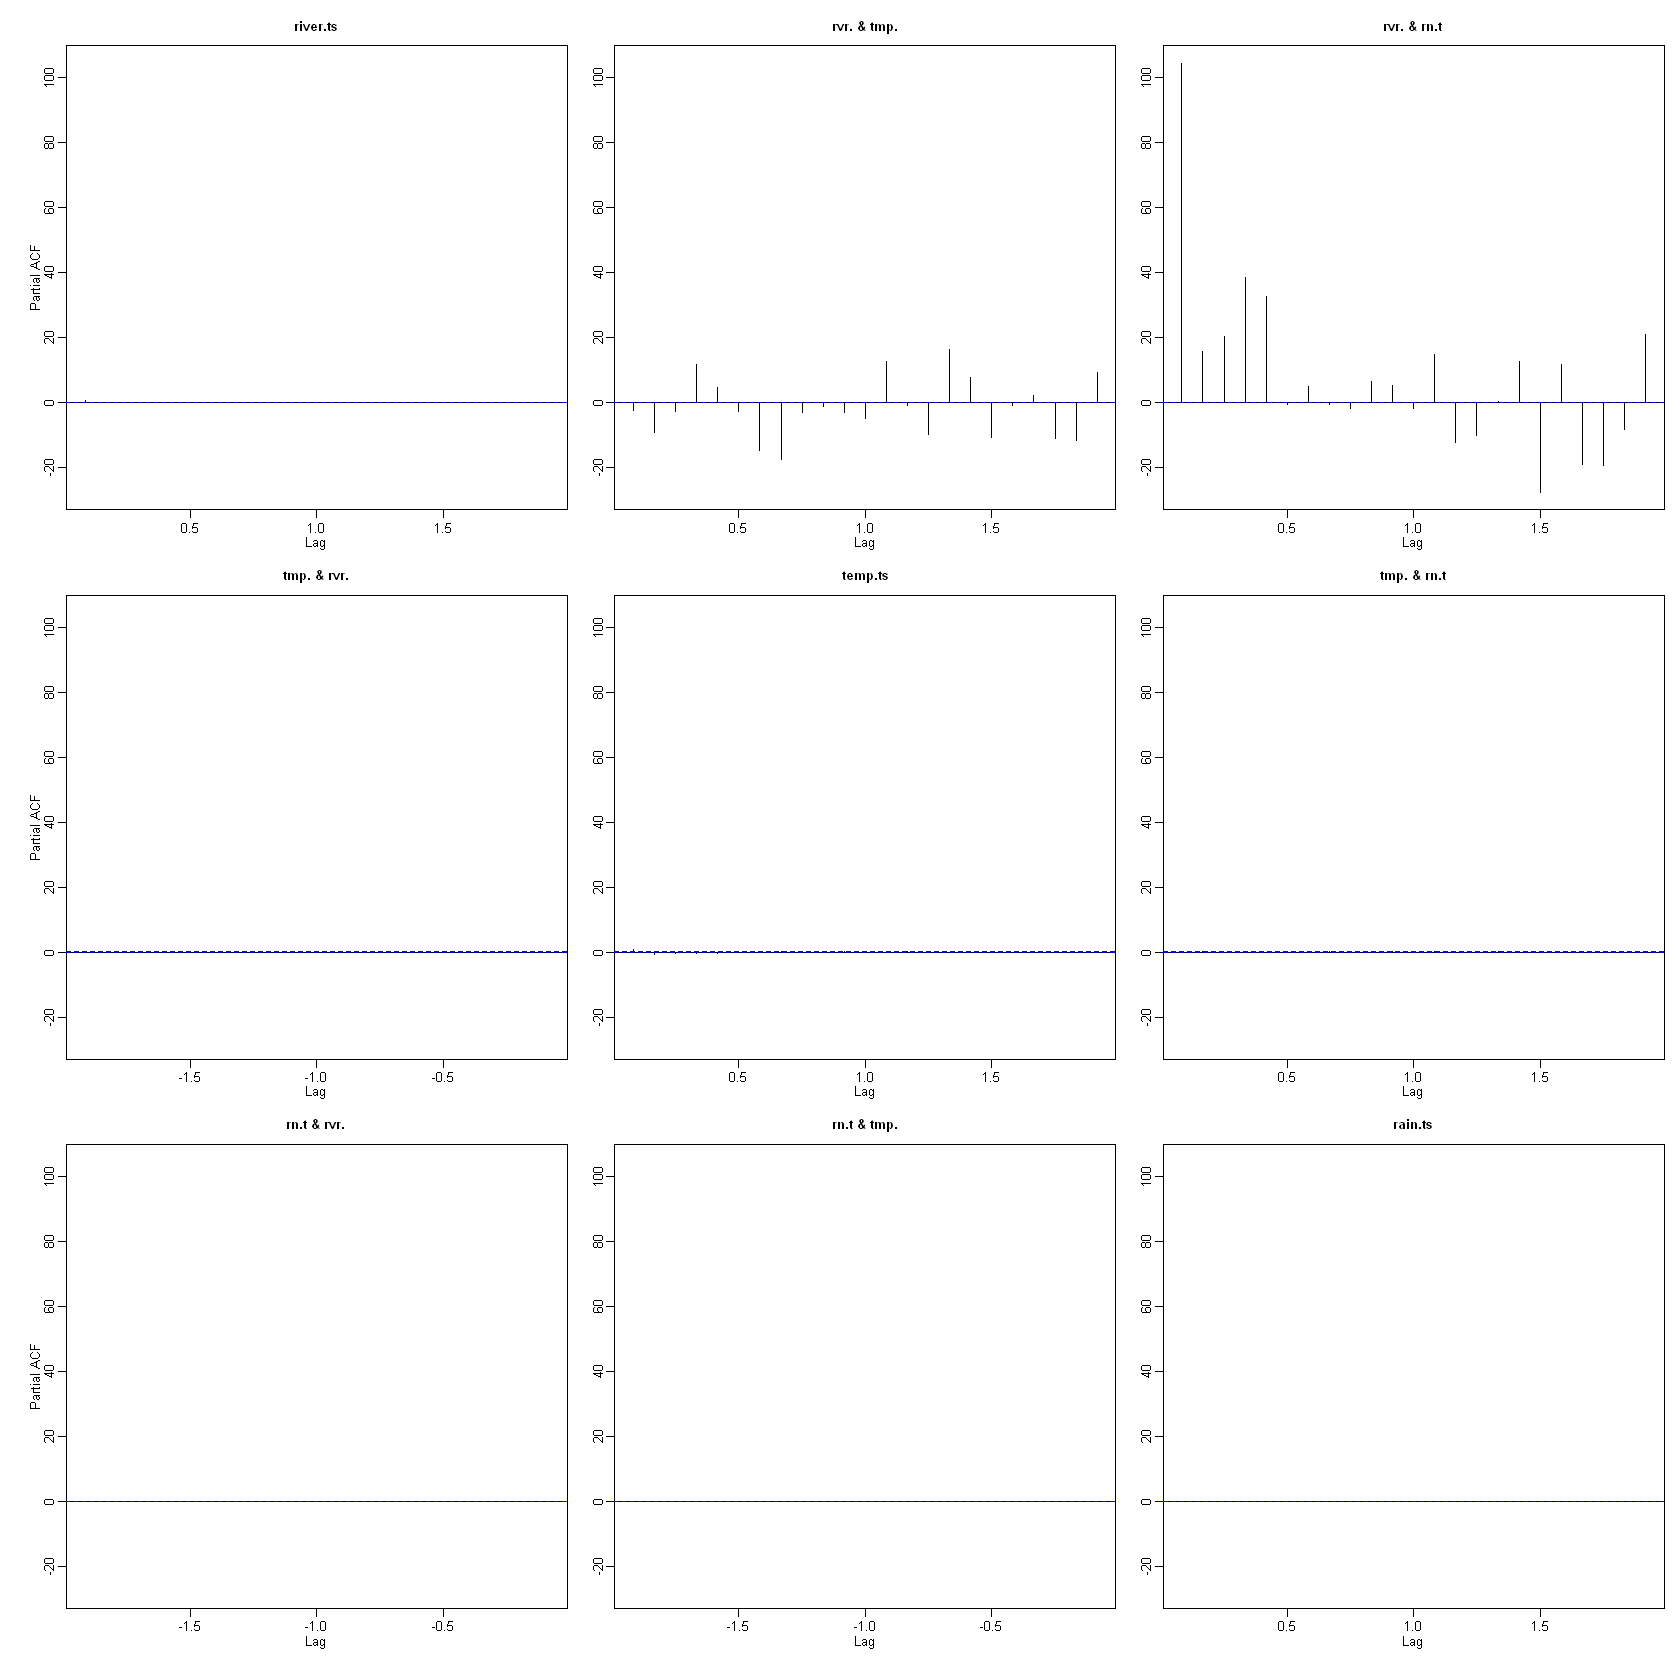

In [5]:
pacf(data.ts, mar=c(3.5,3,1.9,0))

The ACF plot for temperature shows the high degree of seasonality and the ACF plot for rainfall shows a large value at lags 1 and 12. 

There is not a significant lead-lag relationship between river flow and the two time series as shows by the cross-correlation plots.


**Stationarity: Hypothesis Testing**

In [6]:
library(tseries, warn.conflicts = FALSE)
adf.test(river.ts, alternative = "stationary")
adf.test(rain.ts, alternative = "stationary")
adf.test(temp.ts,  alternative = "stationary")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message in adf.test(river.ts, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  river.ts
Dickey-Fuller = -6.9787, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(rain.ts, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  rain.ts
Dickey-Fuller = -8.694, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


Warning message in adf.test(temp.ts, alternative = "stationary"):
"p-value smaller than printed p-value"



	Augmented Dickey-Fuller Test

data:  temp.ts
Dickey-Fuller = -9.0394, Lag order = 9, p-value = 0.01
alternative hypothesis: stationary


- We will further assess the stationarity for all three time series using the adf.test() R command. 
- In all three cases, **the p-value is small and thus we reject the null hypothesis of non-stationarity hence concluding that all three time series are stationary**.
- Note that we don’t quite have stationarity particularly for the temperature data due to seasonality. Thus, you should be careful not to over-interpret the results. 
- The river flow and rain time series show some cyclical patters although a time series with cyclic behavior (but with no trend or seasonality) can actually be stationary. 
- **On the other hand, a seasonal time series such as the temperature time series is non-stationary, and hence we should NOT reject the null hypothesis**. 

Why then reject the null for the temperature time series? There are two issues to consider here. 

- First, the lag used as a default in the adf.test() command is 9, which is lower than the length of the period which is 12.
- Second, the ADF test is not as reliable in detecting seasonality.

In [7]:
library(urca)
ur.kpss(rain.ts,use.lag=12)
ur.kpss(river.ts,use.lag=12)
summary(ur.kpss(temp.ts,use.lag=12))


####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.0586 



####################################### 
# KPSS Unit Root / Cointegration Test # 
####################################### 

The value of the test statistic is: 0.5057 



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 12 lags. 

Value of test-statistic is: 1.7421 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Next I applied **another test commonly used to evaluate stationarity, called the KPSS test** standing for the initials of the names of the authors introducing this test. I also printed out the summary of the last test in order to get the values of the critical points.

For this test, we don’t have p-values but the output provides the values of the test statistics to be compared with the critical points.

The critical values are provided for different significance levels, for example, the critical value for the  0.01 significance level is 0.739. 

**The null hypothesis of the KPSS test is different than for the ADF test, specifically, it is that the time series is stationary. We reject the null hypothesis when the test statistic is larger than the critical point.**

- Based on this, we do not reject the null hypothesis for the river flow and rain time series at the significance level 0.01 
- but we reject the null hypothesis for the temperature time series as we actually expected since it is seasonal. 

Note that this time, I specified lag=12.

**Transformation & Differencing**

We have two observations about the time series that are relevant for the modeling of the three time series. 

- One is that the river flow time series displays some sort of non-constant variability over time, suggesting transformation – hence we apply here a log-transformation. 
- Second, there is seasonality in the temperature data, suggesting using a lag 12 differencing

**Log Transformed Time Series**

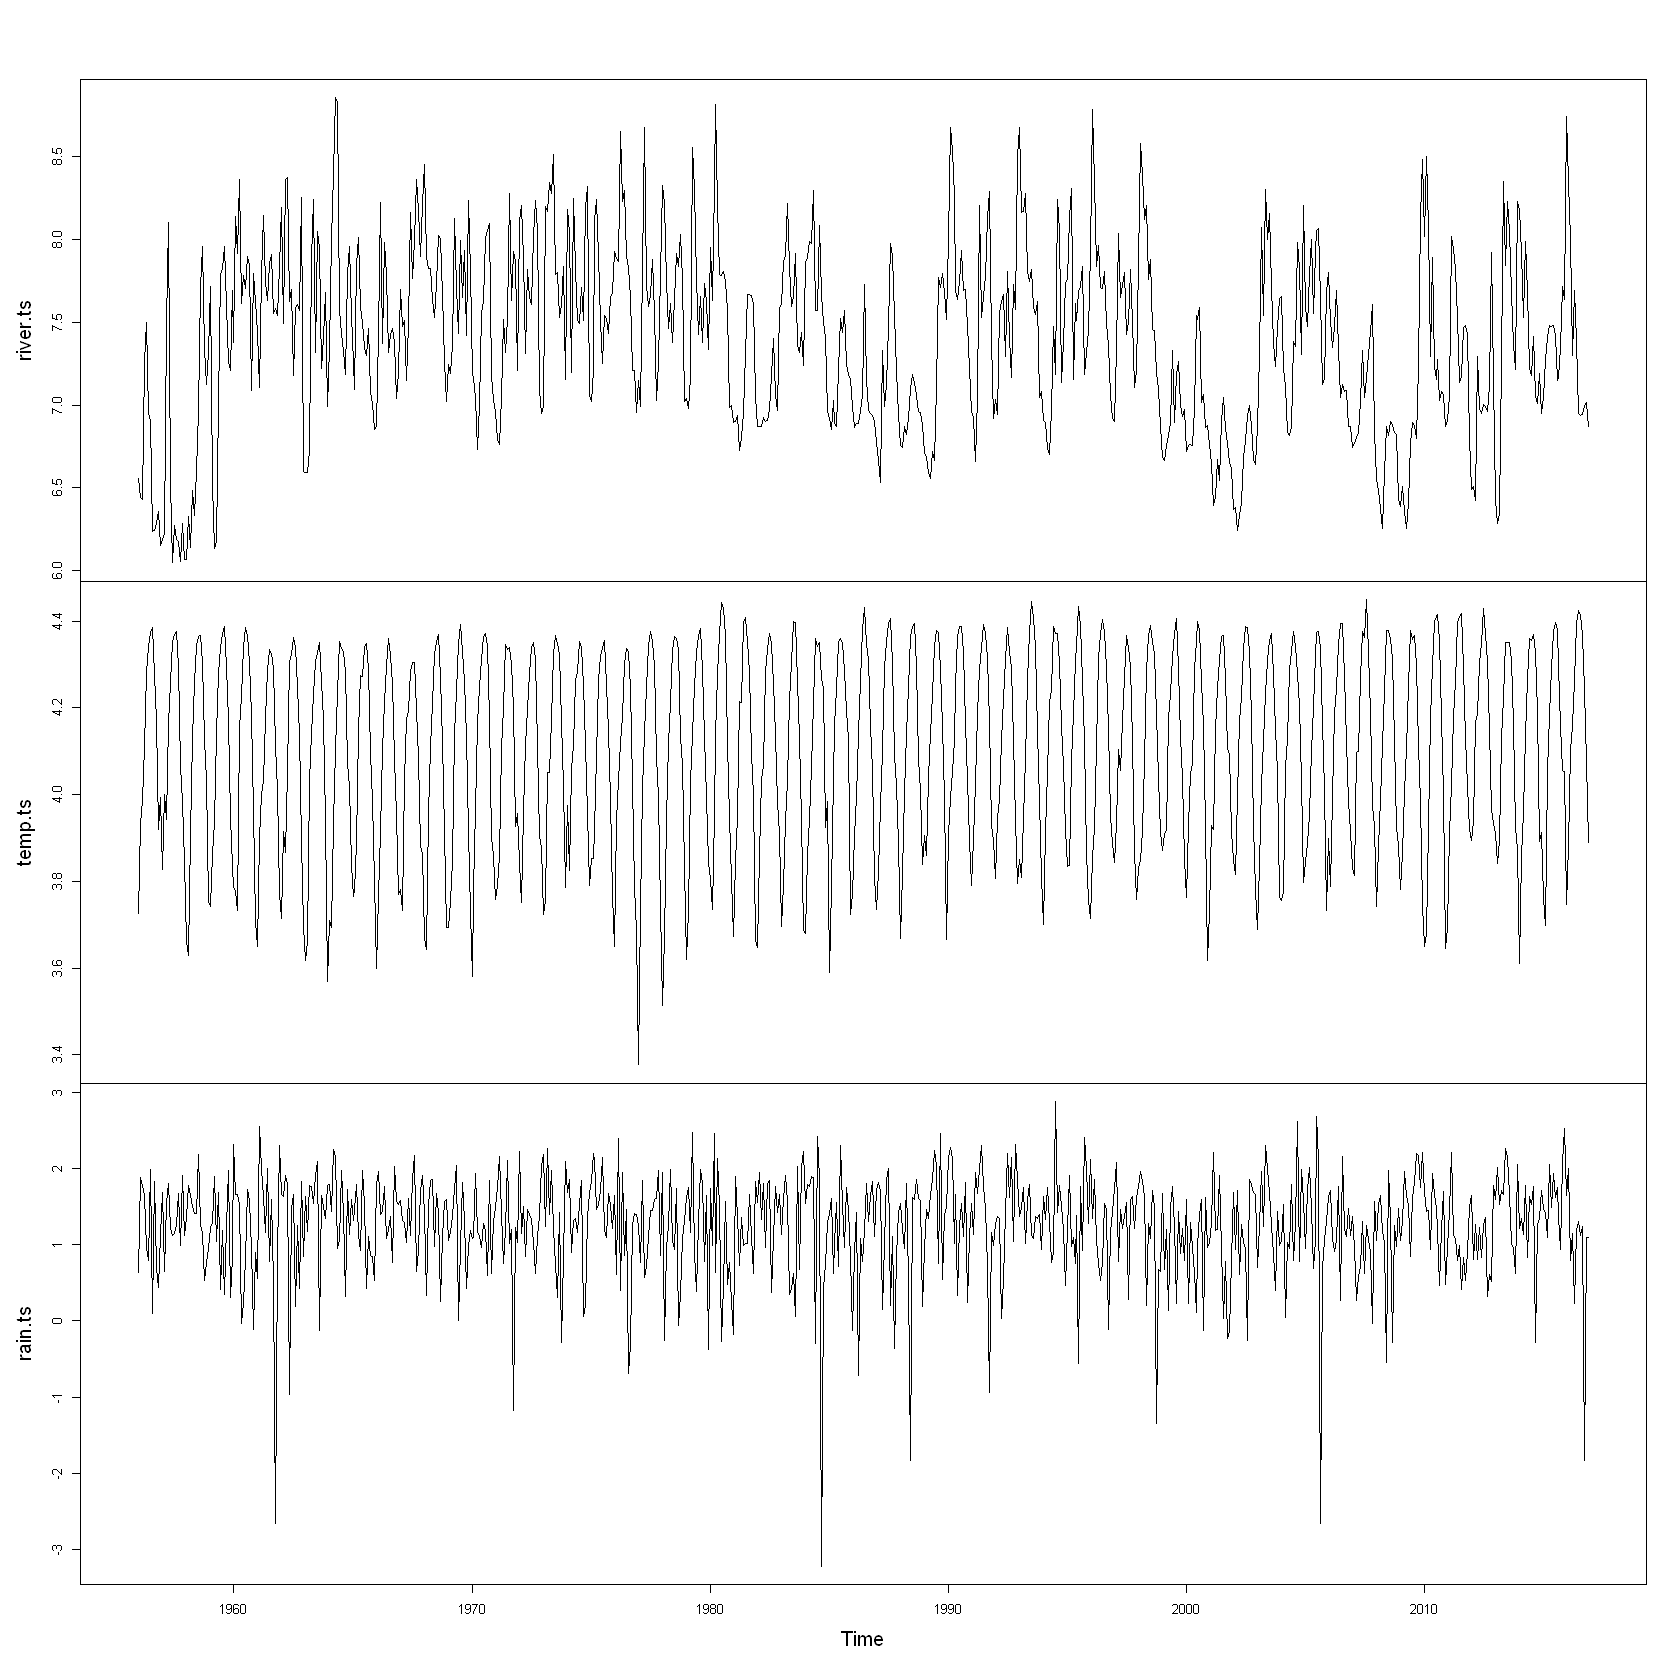

In [8]:
#Log transformation
plot(log(data.ts), type="l",main="")

These are the log transformed time series. 
- The non-constant variance for the river flow time series is stabilized. 
- We also see that the cyclical pattern for the rainfall time series is not removed after log-transformation.

**Differenced Time Series**

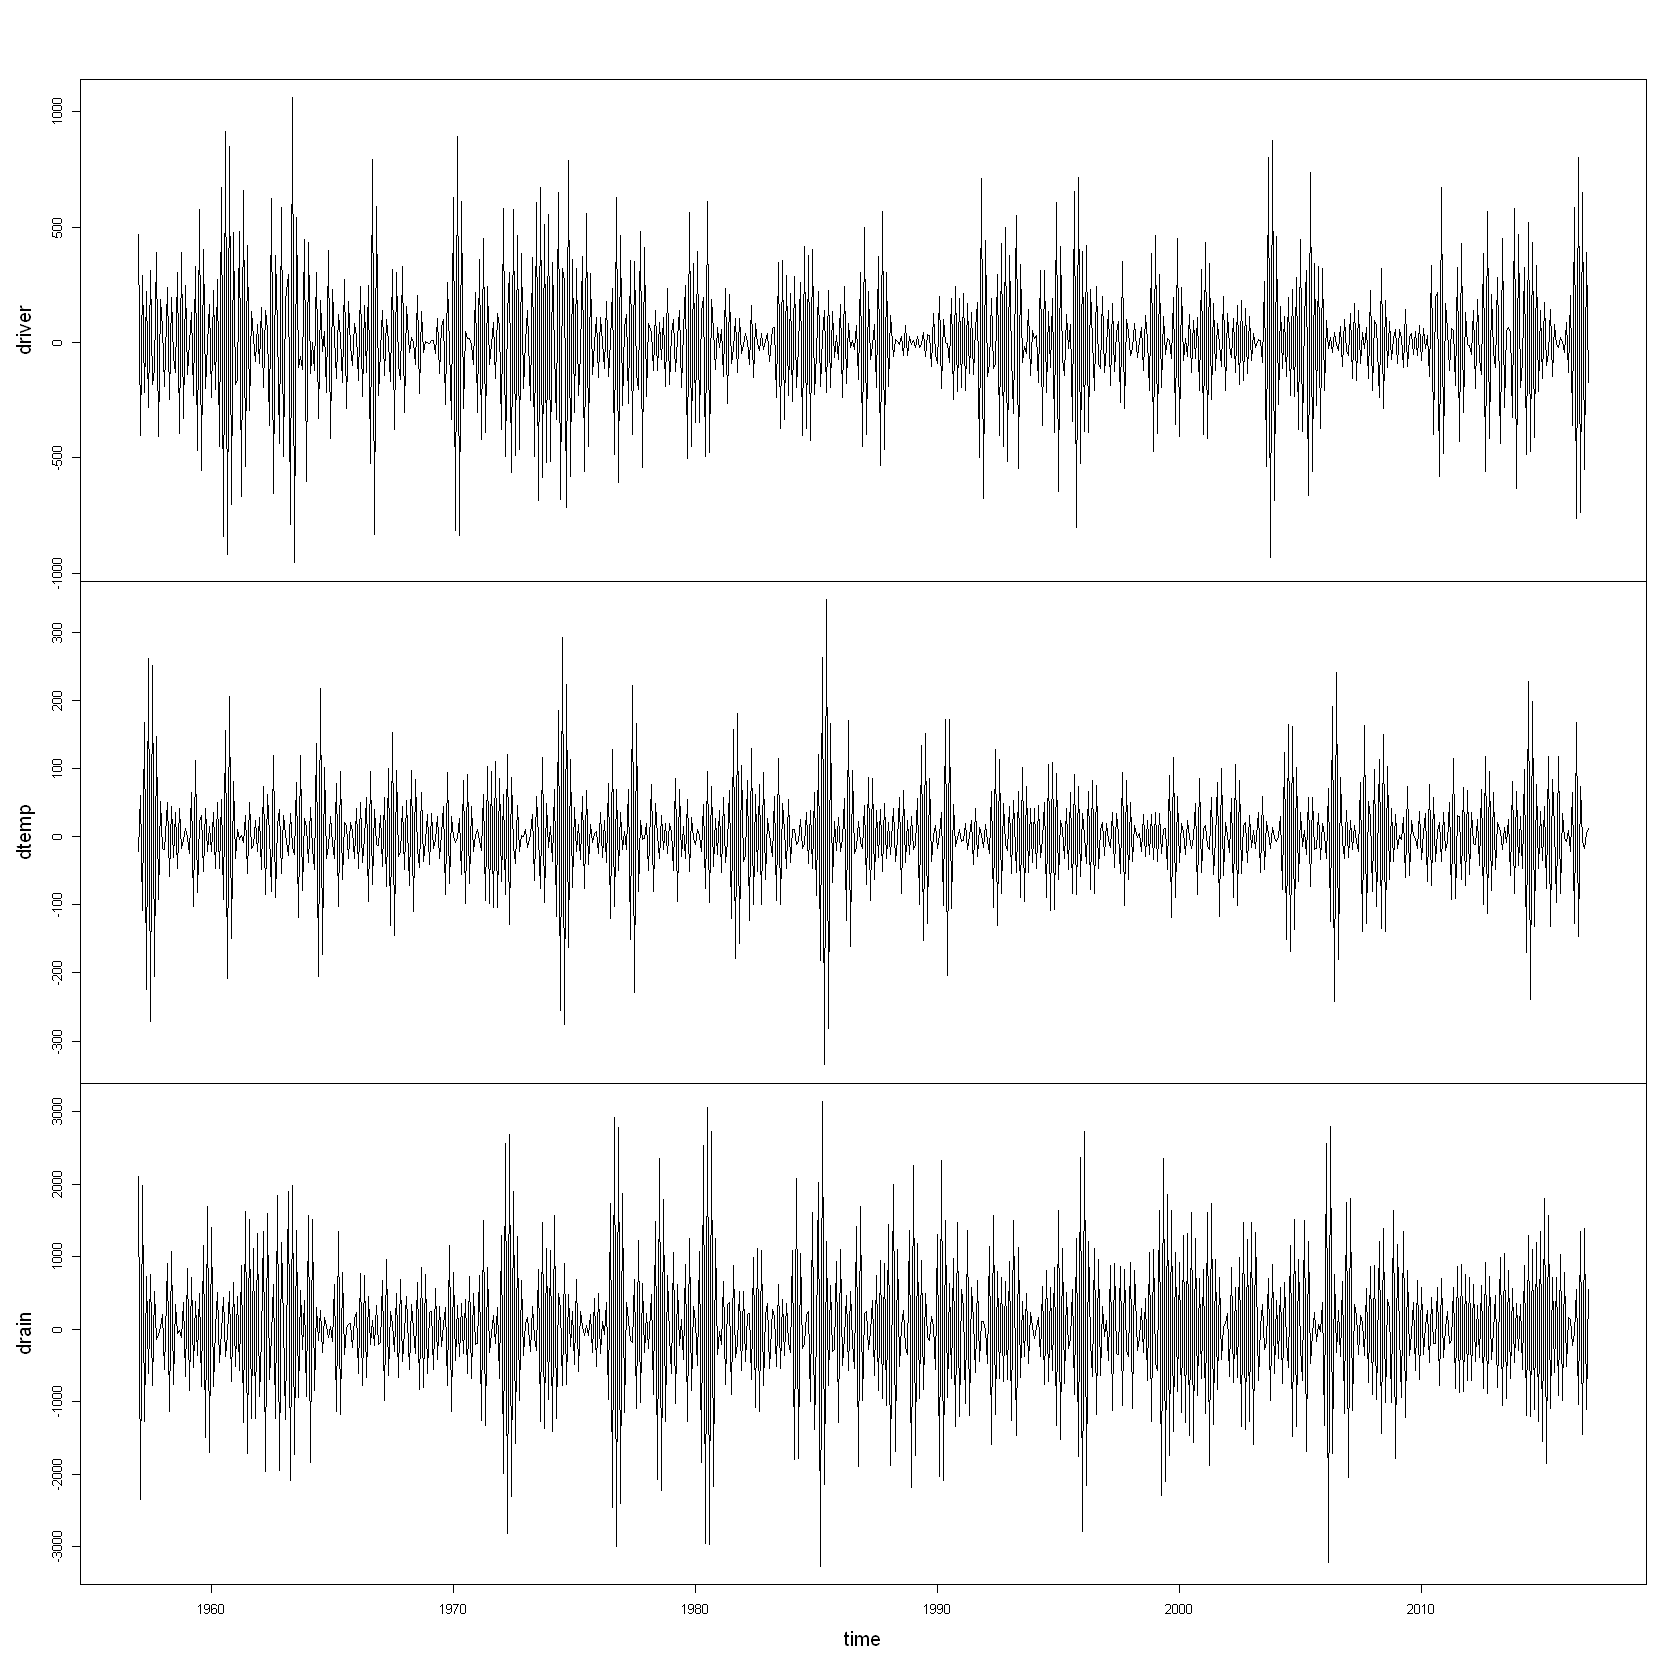

In [9]:
#Using seasonal differencing of 12 months and log transformation
dtemp=diff(log(temp.ts),differences = 12)
drain=diff(log(rain.ts),differences = 12)
driver=diff(log(river.ts),differences = 12)

ddata.ts = ts.union(driver,dtemp,drain)

plot(ddata.ts,xlab="time",main="",type="l")

These are the plots of the difference time series. The seasonality in the temperature and cyclical pattern in the rain fall are not present anymore.

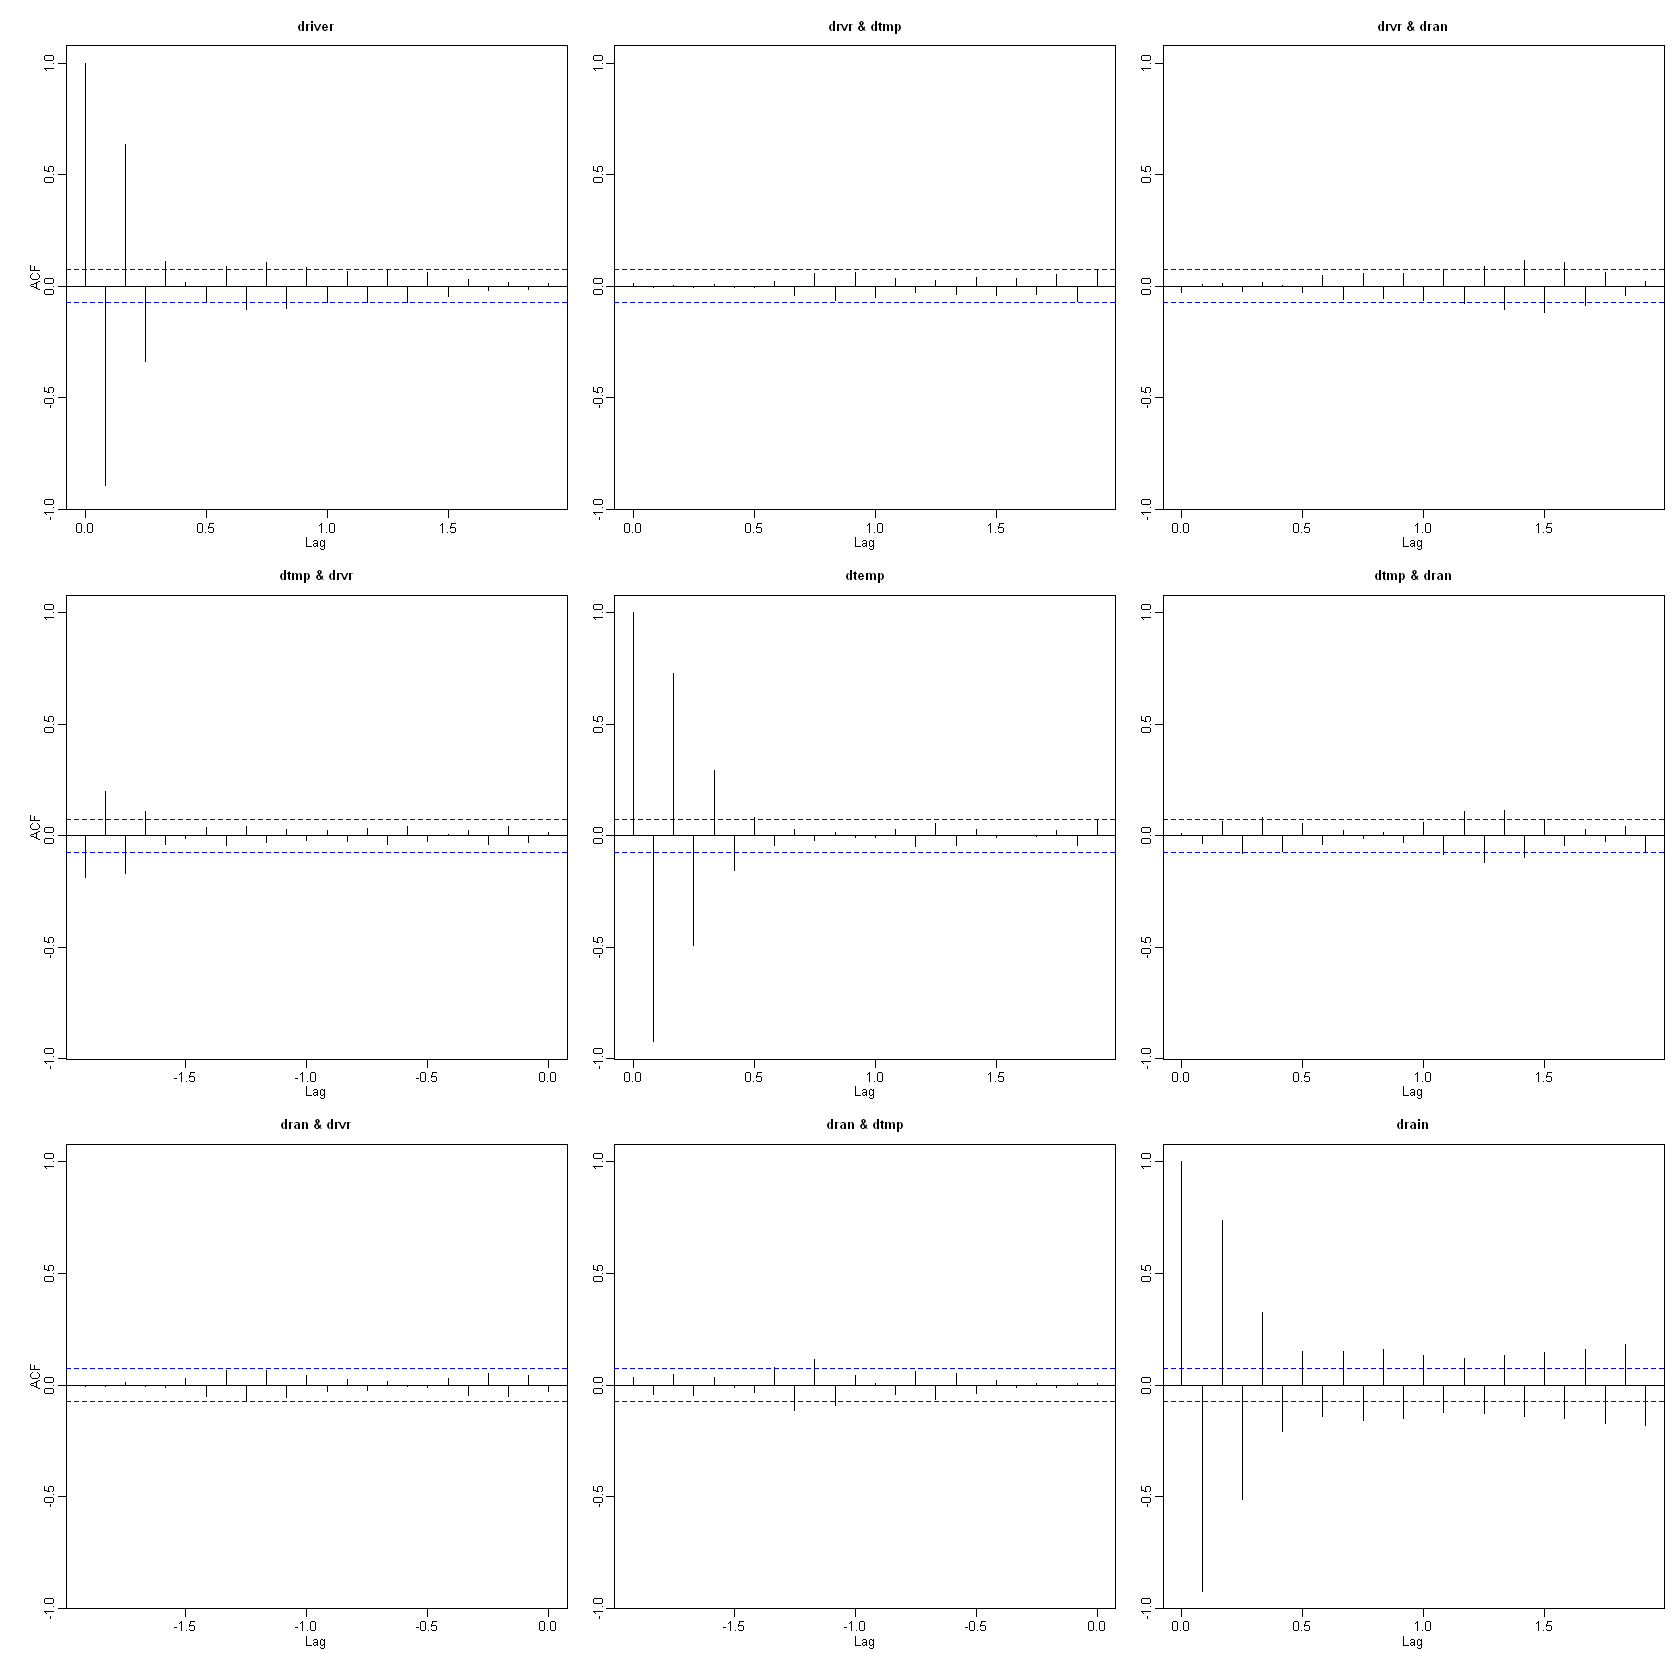

In [10]:
acf(ddata.ts, mar=c(3.5,3,1.9,0))

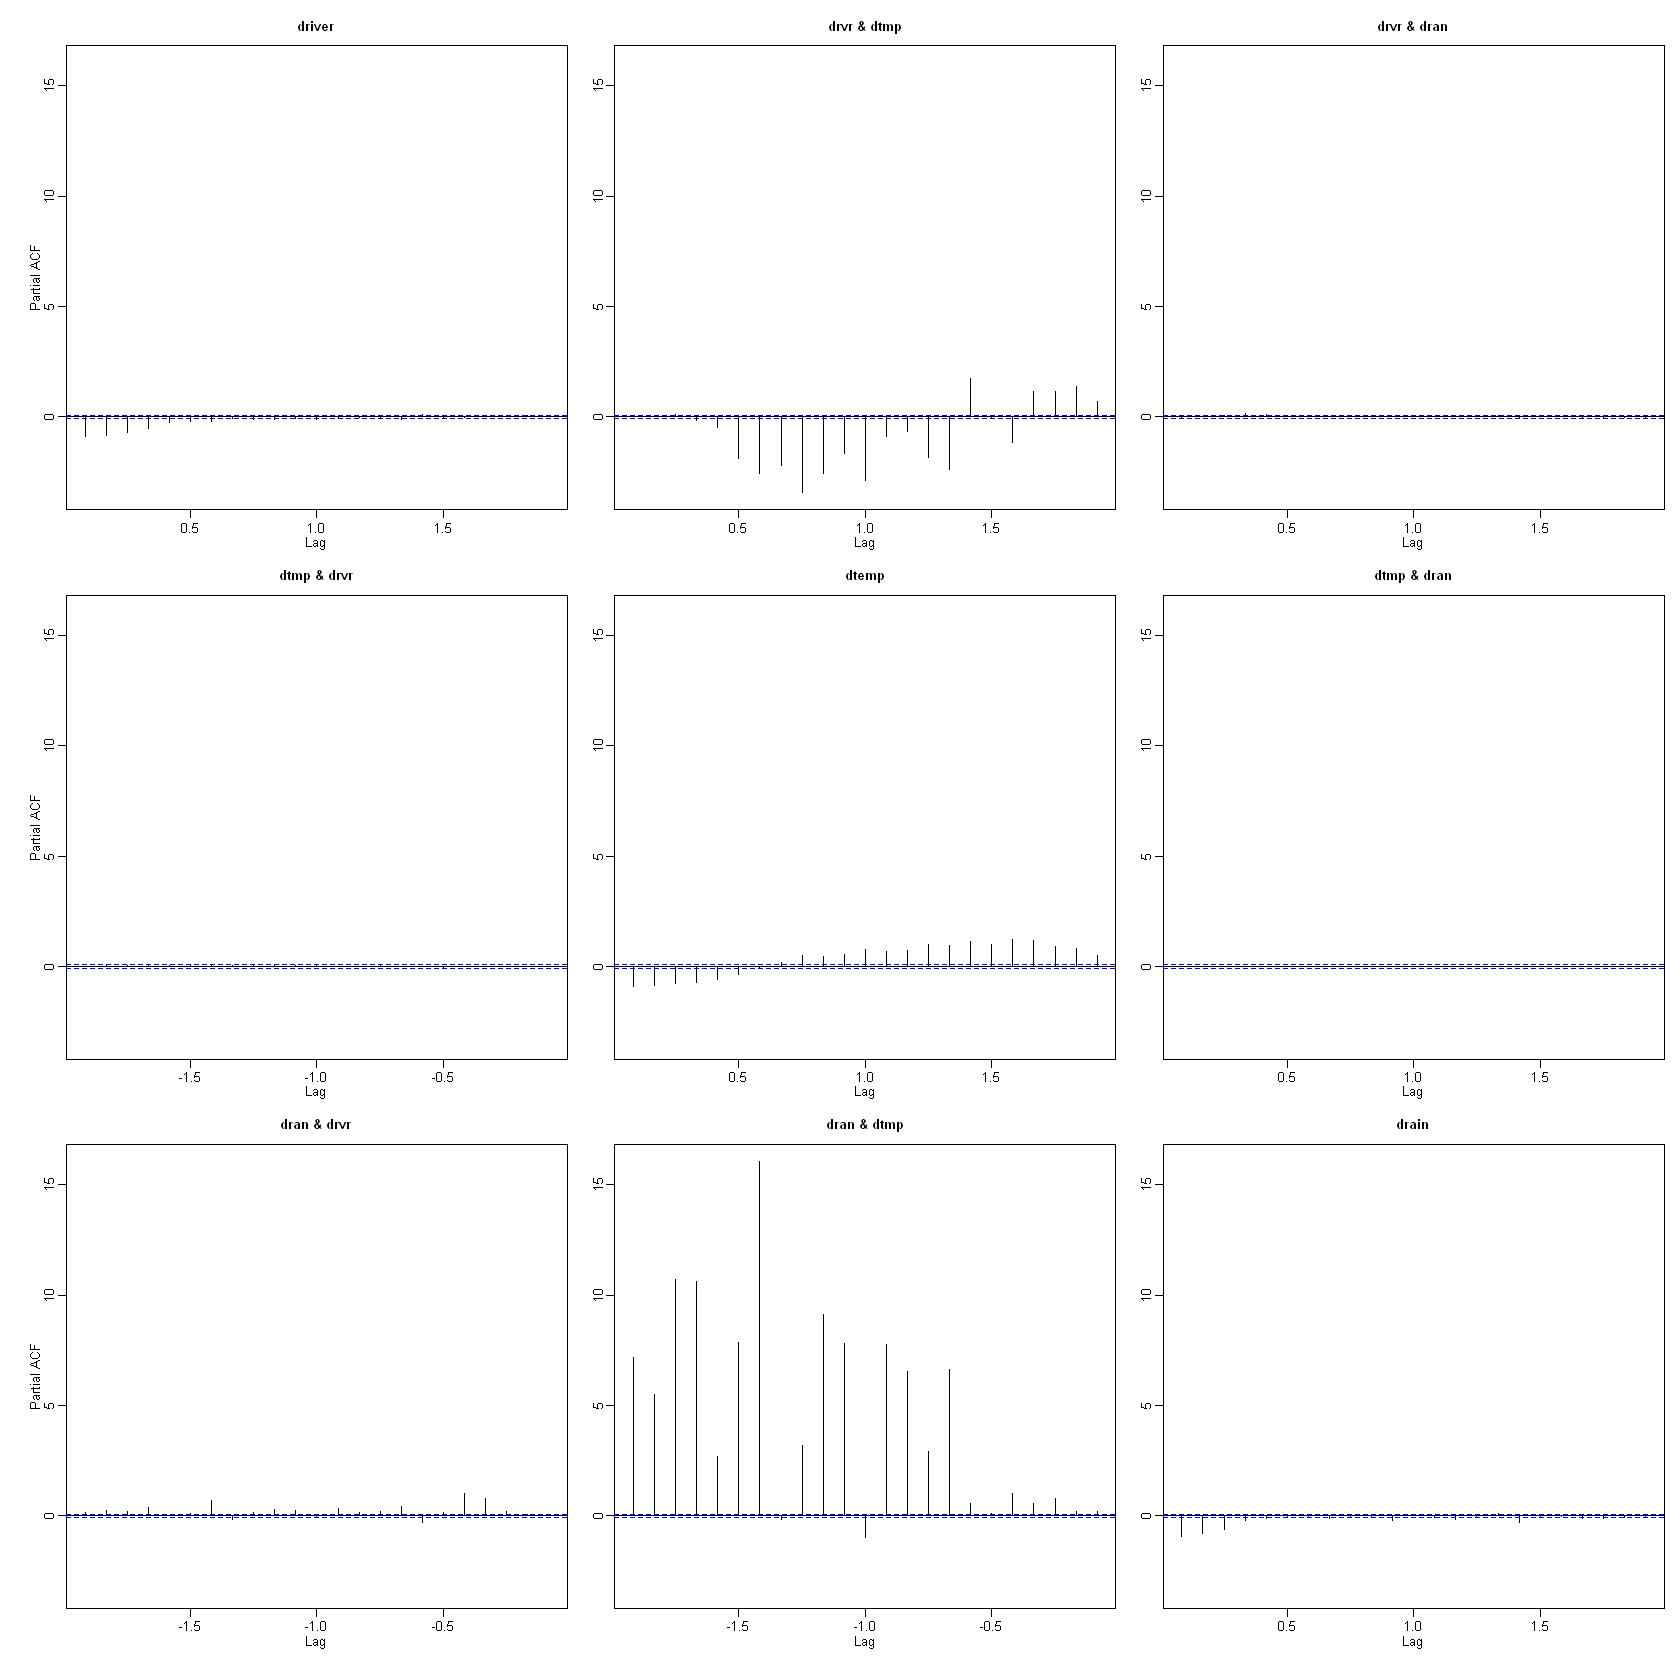

In [11]:
pacf(ddata.ts, mar=c(3.5,3,1.9,0))

### Chattahoochee River Flow: Univariate Model Fitting & Prediction

Study of the river flow data example by first applying univariate modeling and prediction techniques

**ARIMA Modeling**

- I will begin the modeling of the river flow using univariate time series models.
- We will apply the modeling on the log-transformed time series since we identified that the variability in the river flow does change over time hence we use the log transformation to stabilize the variability. 
- I also split the data into training and testing where the training data include all years from 1956 to 2015 and the testing data including the last year of data -- 2016.

I am not showing here the code for model selection since it was already discussed for other case studies in previous modules. 

- The selected orders for the river flow time series are 1 and 4 for the ARMA without no differencing and no seasonal component.
- With these selected orders, we fit the seasonal ARIMA model as provided on the slide.

In [12]:
options(warn=-1)

#### Data preparation for models: Testing Vs Training ###################
n = nrow(data.ts)
## Training data: 1956 to 2015
data.train=data.ts[1:(n-12),]
## Test data: 2016 
data.test=data.ts[(n-11):n,]

log_river=ts(log(data.train[,1]),start=1956, freq=12)
log_river2=ts(log(data.test[,1]),start=2016, freq=12)

#####################################################
#### Model 1: ARIMA model (modeling log of river flow)
######################################################
final.aic = Inf
final.order = c(0,0,0,0)
for (p in 1:6) for (d in 0:1) for (q in 1:6) for(s in 0:1){
   current.aic = AIC(arima(log_river, order=c(p, d, q), seasonal = list(order=c(0,s,0), period=12), method="ML"))
   if (current.aic < final.aic) {
     final.aic = current.aic
     final.order = c(p, d, q,s)
     
   }
 }

final.order

[1] 1 0 4 0

In [13]:
model.arima = arima(log_river, order=c(1,0,4), method="ML") 

**Residual Analysis**

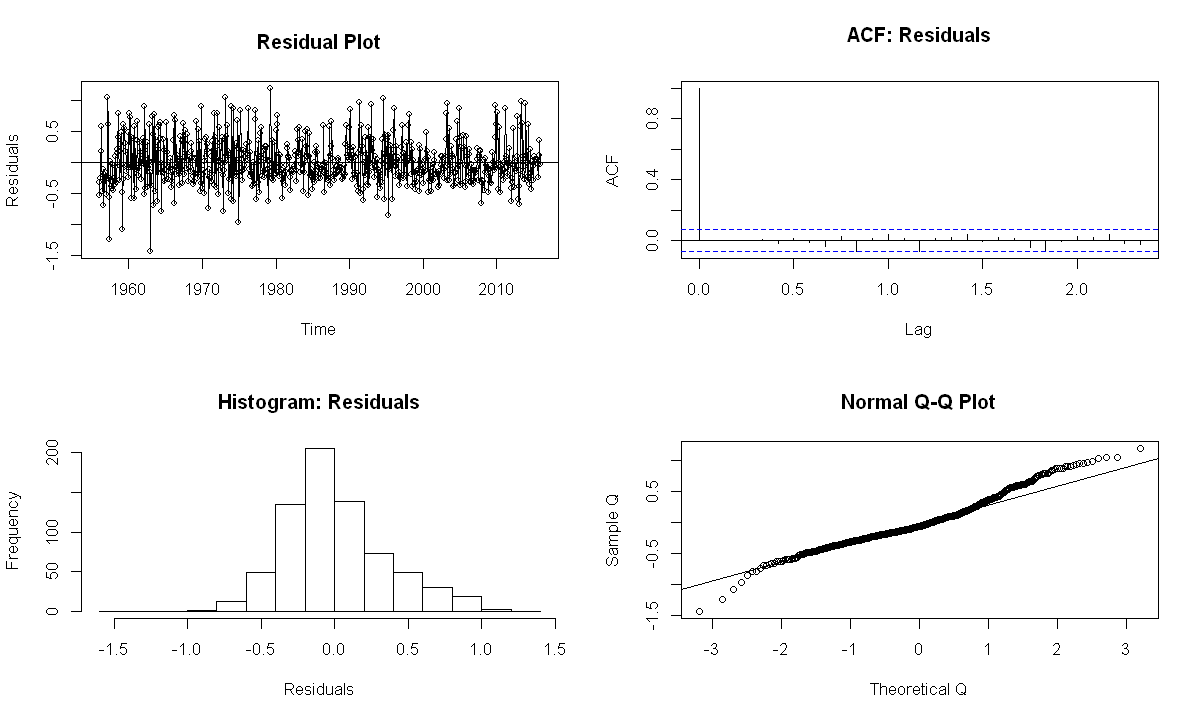

In [14]:
options(repr.plot.width=10, repr.plot.height=6)

## Residual analysis
par(mfrow=c(2,2))
plot(resid(model.arima), ylab='Residuals',type='o',main="Residual Plot")
abline(h=0)
acf(resid(model.arima),main="ACF: Residuals")
hist(resid(model.arima),xlab='Residuals',main='Histogram: Residuals')
qqnorm(resid(model.arima),ylab="Sample Q",xlab="Theoretical Q")
qqline(resid(model.arima))

These are the residual plots for the fitted ARIMA model. 
- The residuals plot does not show any particular pattern
- while the acf plot resembling that of white noise. 
- The histogram and the probability normal plot show that the residuals have an approximate normal distribution.

**Testing for Correlated Residuals**

- Let’s next apply a test for uncorrelated residuals using the Box.test() R command. 
- Two important inputs in this R command are fitdf and lag. **The input for fitdf is the number of coefficients in the ARMA model; since we use an ARMA with order 1 and 4, then fitdf is 5**. 
- The lag input will need to be higher than fitdf. Here we consider to be 6. 
- We also have the option to use different test statistics provided by type.

In [15]:
Box.test(model.arima$resid, lag = (1+4+1), type = "Box-Pierce", fitdf = (1+4))
Box.test(model.arima$resid, lag = (1+4+1), type = "Ljung-Box", fitdf = (1+4))


	Box-Pierce test

data:  model.arima$resid
X-squared = 0.51611, df = 1, p-value = 0.4725



	Box-Ljung test

data:  model.arima$resid
X-squared = 0.52129, df = 1, p-value = 0.4703


The p-value for the test for uncorrelated data is large, meaning that we do not reject the null hypothesis of uncorrelated residuals, hence it is plausible that the residuals to be uncorrelated.

**Prediction**

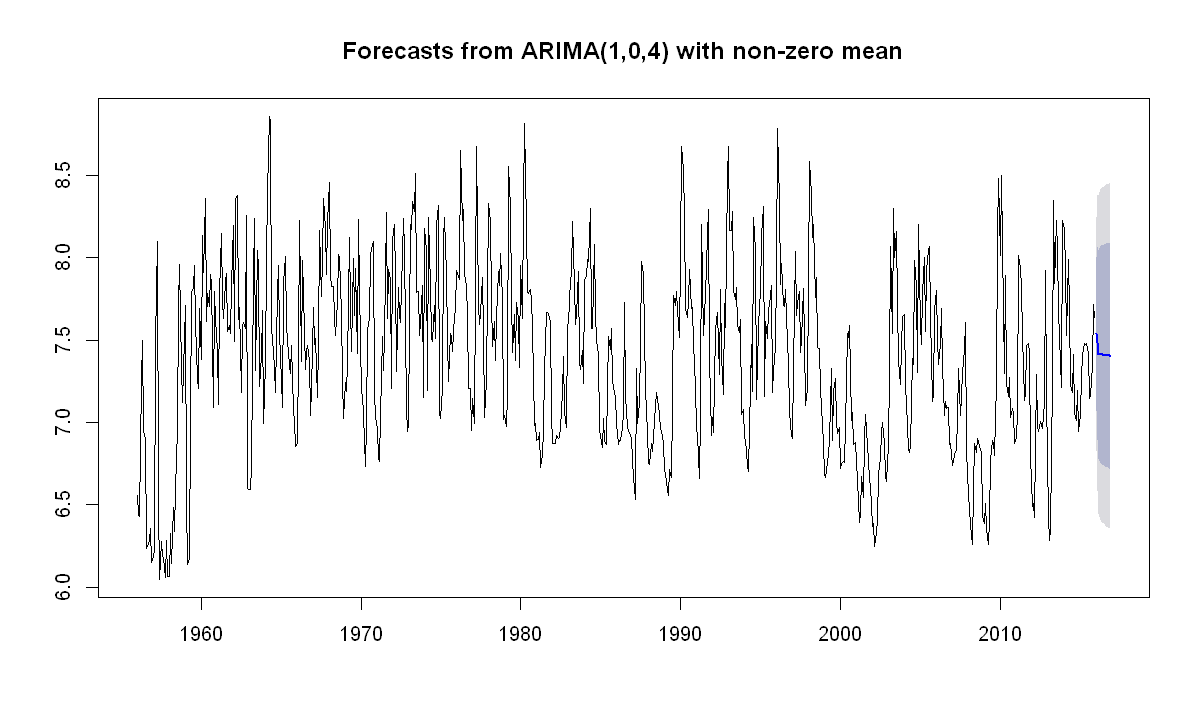

In [16]:
options(repr.plot.width=10, repr.plot.height=6)

## Note that you will need to use recent R version for this to work
library(forecast)

#Predictions versus actual
plot(forecast(model.arima,h=12))

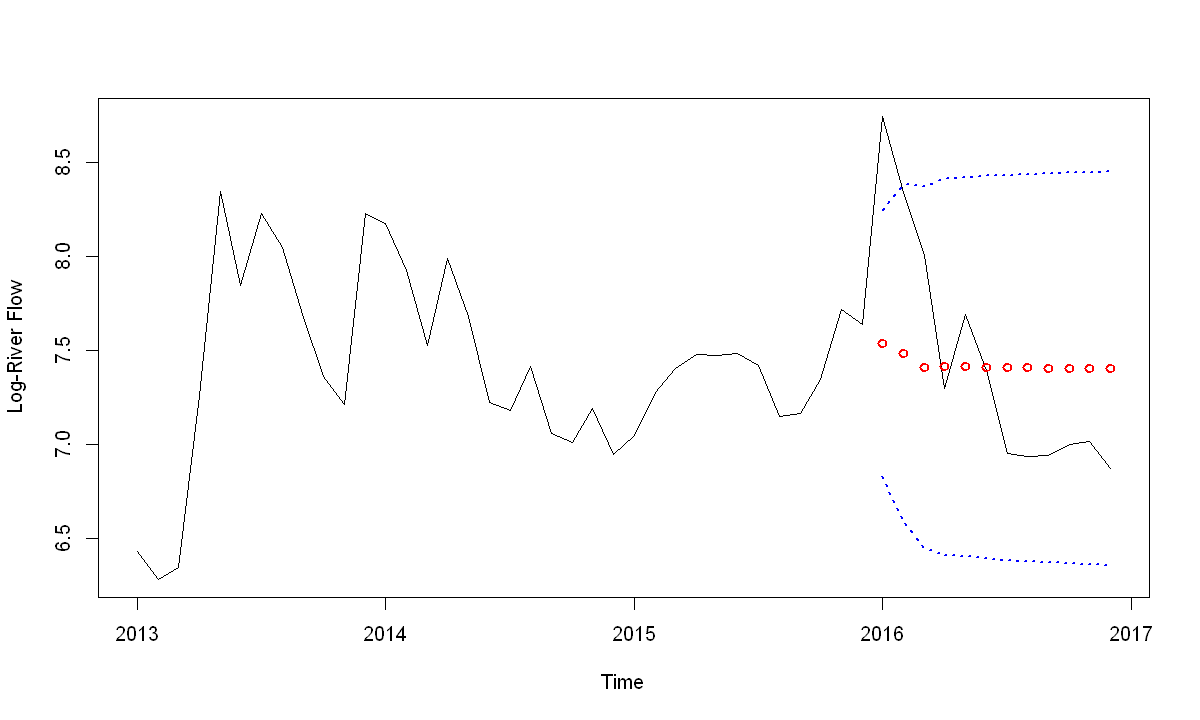

In [17]:
## Plot the forecast vs observed along with prediction bands
fore = forecast(model.arima,h=12)
fore=as.data.frame(fore)

point.fore = ts(fore[,1],start=2016, freq=12)
lo.fore = ts(fore[,4],start=2016, freq=12)
up.fore = ts(fore[,5],start=2016, freq=12)
part_log_river = ts(log(river[(n-47):n]),start=2013, freq=12)

ymin=min(c(part_log_river,lo.fore))
ymax=max(c(part_log_river,up.fore))

par(mfrow=c(1,1))
plot(part_log_river, ylim=c(ymin,ymax), ylab="Log-River Flow", type="l",main="")
points(point.fore,lwd=2,col="red")
lines(lo.fore,lty=3,lwd= 2, col="blue")
lines(up.fore,lty=3,lwd= 2, col="blue")

In [18]:
fore

Point Forecast Lo 80    Hi 80    Lo 95    Hi 95   
Jan 2016 7.538169       7.075368 8.000971 6.830375 8.245963
Feb 2016 7.484250       6.898476 8.070025 6.588385 8.380115
Mar 2016 7.411100       6.781879 8.040321 6.448789 8.373411
Apr 2016 7.413557       6.758586 8.068529 6.411865 8.415249
May 2016 7.411871       6.751641 8.072102 6.402136 8.421606
Jun 2016 7.410269       6.745325 8.075213 6.393325 8.427213
Jul 2016 7.408746       6.739574 8.077919 6.385335 8.432158
Aug 2016 7.407299       6.734331 8.080268 6.378083 8.436516
Sep 2016 7.405924       6.729546 8.082303 6.371492 8.440356
Oct 2016 7.404617       6.725174 8.084061 6.365498 8.443737
Nov 2016 7.403376       6.721176 8.085575 6.360041 8.446710
Dec 2016 7.402195       6.717516 8.086874 6.355069 8.449322

**ARIMAX Modeling**

Next we will extend the ARIMA model to account for exogenous factors such as temperature and rainfall, called ARIMAX.

**This time I used the Arima() R command in the forecast library, which works better when specifying exogenous factors through the ‘xreg’ option.**

As provided here, both the temperature and rainfall time series are considered exogenous factors in modeling and predicting river flow. 

We apply again the model selection; the selected orders for ARMA are 1 and 4 with no seasonality. Next, I plotted the residuals.

In [19]:
#####################################################
#### Model 2: ARIMAX model (modeling log of river flow)
#### with exogeneous factors
######################################################

log_rain=ts(log(data.train[,"rain.ts"]),start=1956, freq=12)
log_temp=ts(log(data.train[,"temp.ts"]),start=1956, freq=12)

log_rain2=ts(log(data.test[,"rain.ts"]),start=2016, freq=12)
log_temp2=ts(log(data.test[,"temp.ts"]),start=2016, freq=12)

final.aic = Inf
final.order = c(0,0,0,0)

for (p in 1:6) for (d in 0:1) for (q in 1:6) for(s in 0:1){
   current.aic = AIC(arima(log_river, order=c(p, d, q), seasonal = list(order=c(0,s,0), period=12), 
                           method="ML",
                           xreg=data.frame(log_rain,log_temp)))
   if (current.aic < final.aic) {
     final.aic = current.aic
     final.order = c(p, d, q,s)
     
   }
 }

final.order

[1] 1 0 4 0

In [20]:
## note: Here I used the command Arima() instead of arima()  
model.arima2 = Arima(log_river, order = c(1,0,4), method="ML", xreg=cbind(log_rain,log_temp))

**ARIMAX Modeling Residuals**

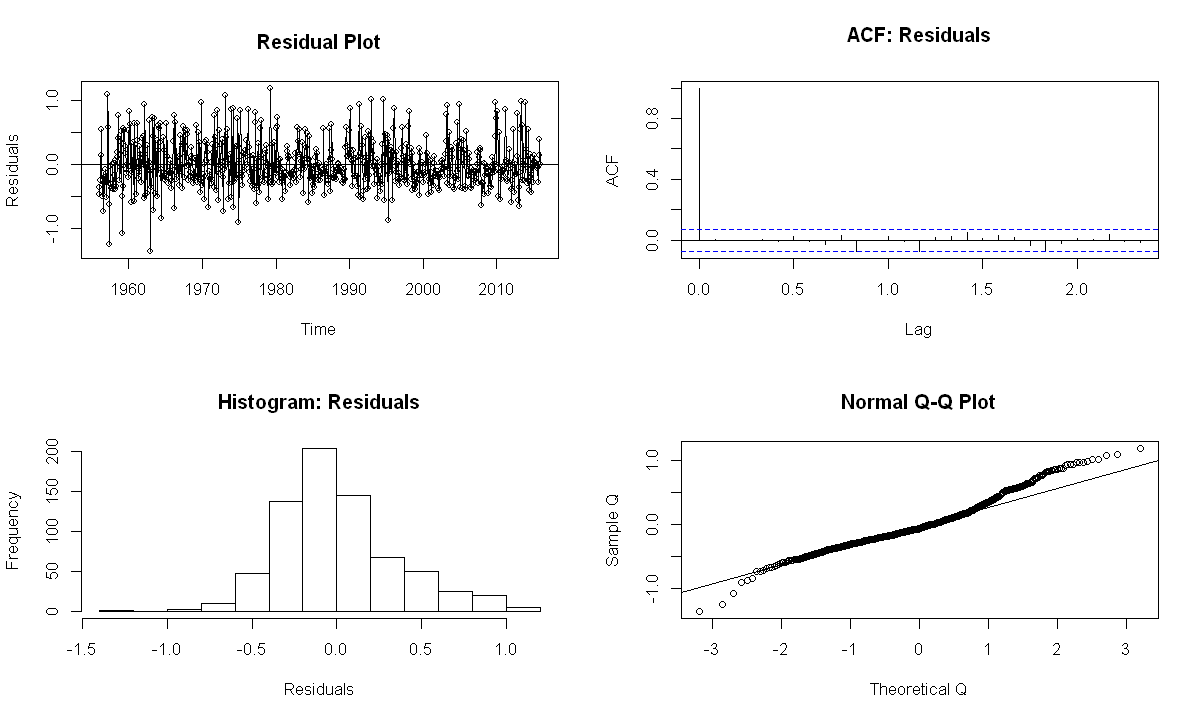

In [21]:
## Residual analysis
par(mfrow=c(2,2))
plot(resid(model.arima2), ylab='Residuals',type='o',main="Residual Plot")
abline(h=0)
acf(resid(model.arima2),main="ACF: Residuals")
hist(resid(model.arima2),xlab='Residuals',main='Histogram: Residuals')
qqnorm(resid(model.arima2),ylab="Sample Q",xlab="Theoretical Q")
qqline(resid(model.arima2))

The residual plots are here. 
- The residual plot does not present any pattern. 
- The acf plot of the residuals resemble that of white noise indicating uncorrelated residuals. 
- The residuals also have a somewhere symmetric distribution, approximately normal distribution, as provided by the histogram and the probability normal plot. 

Hence both the ARIMA and ARIMAX models are good fit for the data. The question is whether adding the exogeneous factors improves the prediction of the river flow?

In [22]:
Box.test(model.arima2$resid, lag = (1+4+1), type = "Box-Pierce", fitdf = (1+4))
Box.test(model.arima2$resid, lag = (1+4+1), type = "Ljung-Box", fitdf = (1+4))


	Box-Pierce test

data:  model.arima2$resid
X-squared = 0.5845, df = 1, p-value = 0.4446



	Box-Ljung test

data:  model.arima2$resid
X-squared = 0.59088, df = 1, p-value = 0.4421


**Prediction Comparison**

To answer this question, we can obtain the forecast for both models. The R code used for extracting the point forecasts and the lower and upper prediction intervals are in the accompanying R code for this lesson.

In [23]:
#Predictions versus actual
#log_rain = log_rain2
#log_temp = log_temp2
fore2 = forecast(model.arima2,h=12,xreg=cbind(log_rain=log_rain2,log_temp =log_temp2))
fore2=as.data.frame(fore2)
fore2

Point Forecast Lo 80    Hi 80    Lo 95    Hi 95   
Jan 2016 7.434482       6.972019 7.896945 6.727206 8.141759
Feb 2016 7.418420       6.836492 8.000349 6.528438 8.308403
Mar 2016 7.412065       6.789002 8.035129 6.459171 8.364959
Apr 2016 7.428816       6.780015 8.077617 6.436560 8.421072
May 2016 7.459246       6.804333 8.114160 6.457643 8.460850
Jun 2016 7.497054       6.836702 8.157406 6.487133 8.506975
Jul 2016 7.504505       6.839309 8.169700 6.487176 8.521833
Aug 2016 7.500699       6.831186 8.170213 6.476767 8.524632
Sep 2016 7.484687       6.811321 8.158052 6.454863 8.514510
Oct 2016 7.447062       6.770257 8.123867 6.411979 8.482145
Nov 2016 7.393792       6.713916 8.073669 6.354010 8.433574
Dec 2016 7.336057       6.653434 8.018680 6.292076 8.380039

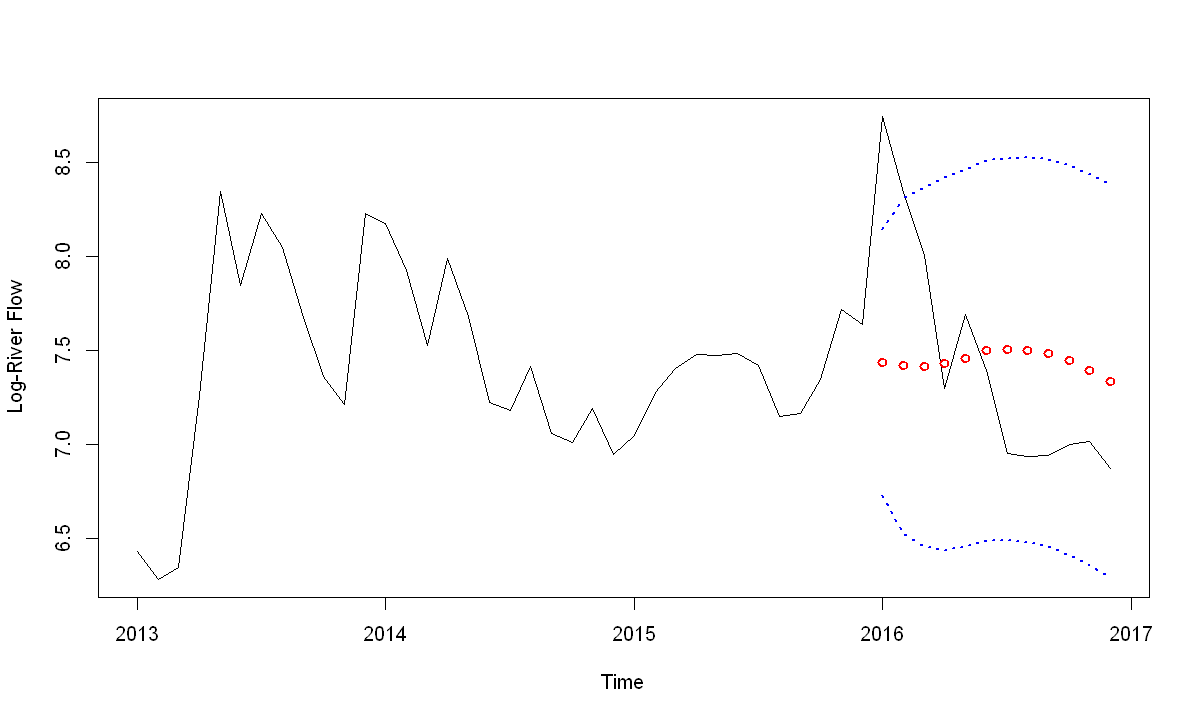

In [24]:
point.fore2 = ts(fore2[,1],start=2016, freq=12)
lo.fore2 = ts(fore2[,4],start=2016, freq=12)
up.fore2 = ts(fore2[,5],start=2016, freq=12)
part_log_river = ts(log(river[(n-47):n]),start=2013, freq=12)

ymin=min(c(part_log_river,lo.fore2))
ymax=max(c(part_log_river,up.fore2))

par(mfrow=c(1,1))
plot(part_log_river, ylim=c(ymin,ymax), ylab="Log-River Flow", type="l",main="")
points(point.fore2,lwd=2,col="red")
lines(lo.fore2,lty=3,lwd= 2, col="blue")
lines(up.fore2,lty=3,lwd= 2, col="blue")

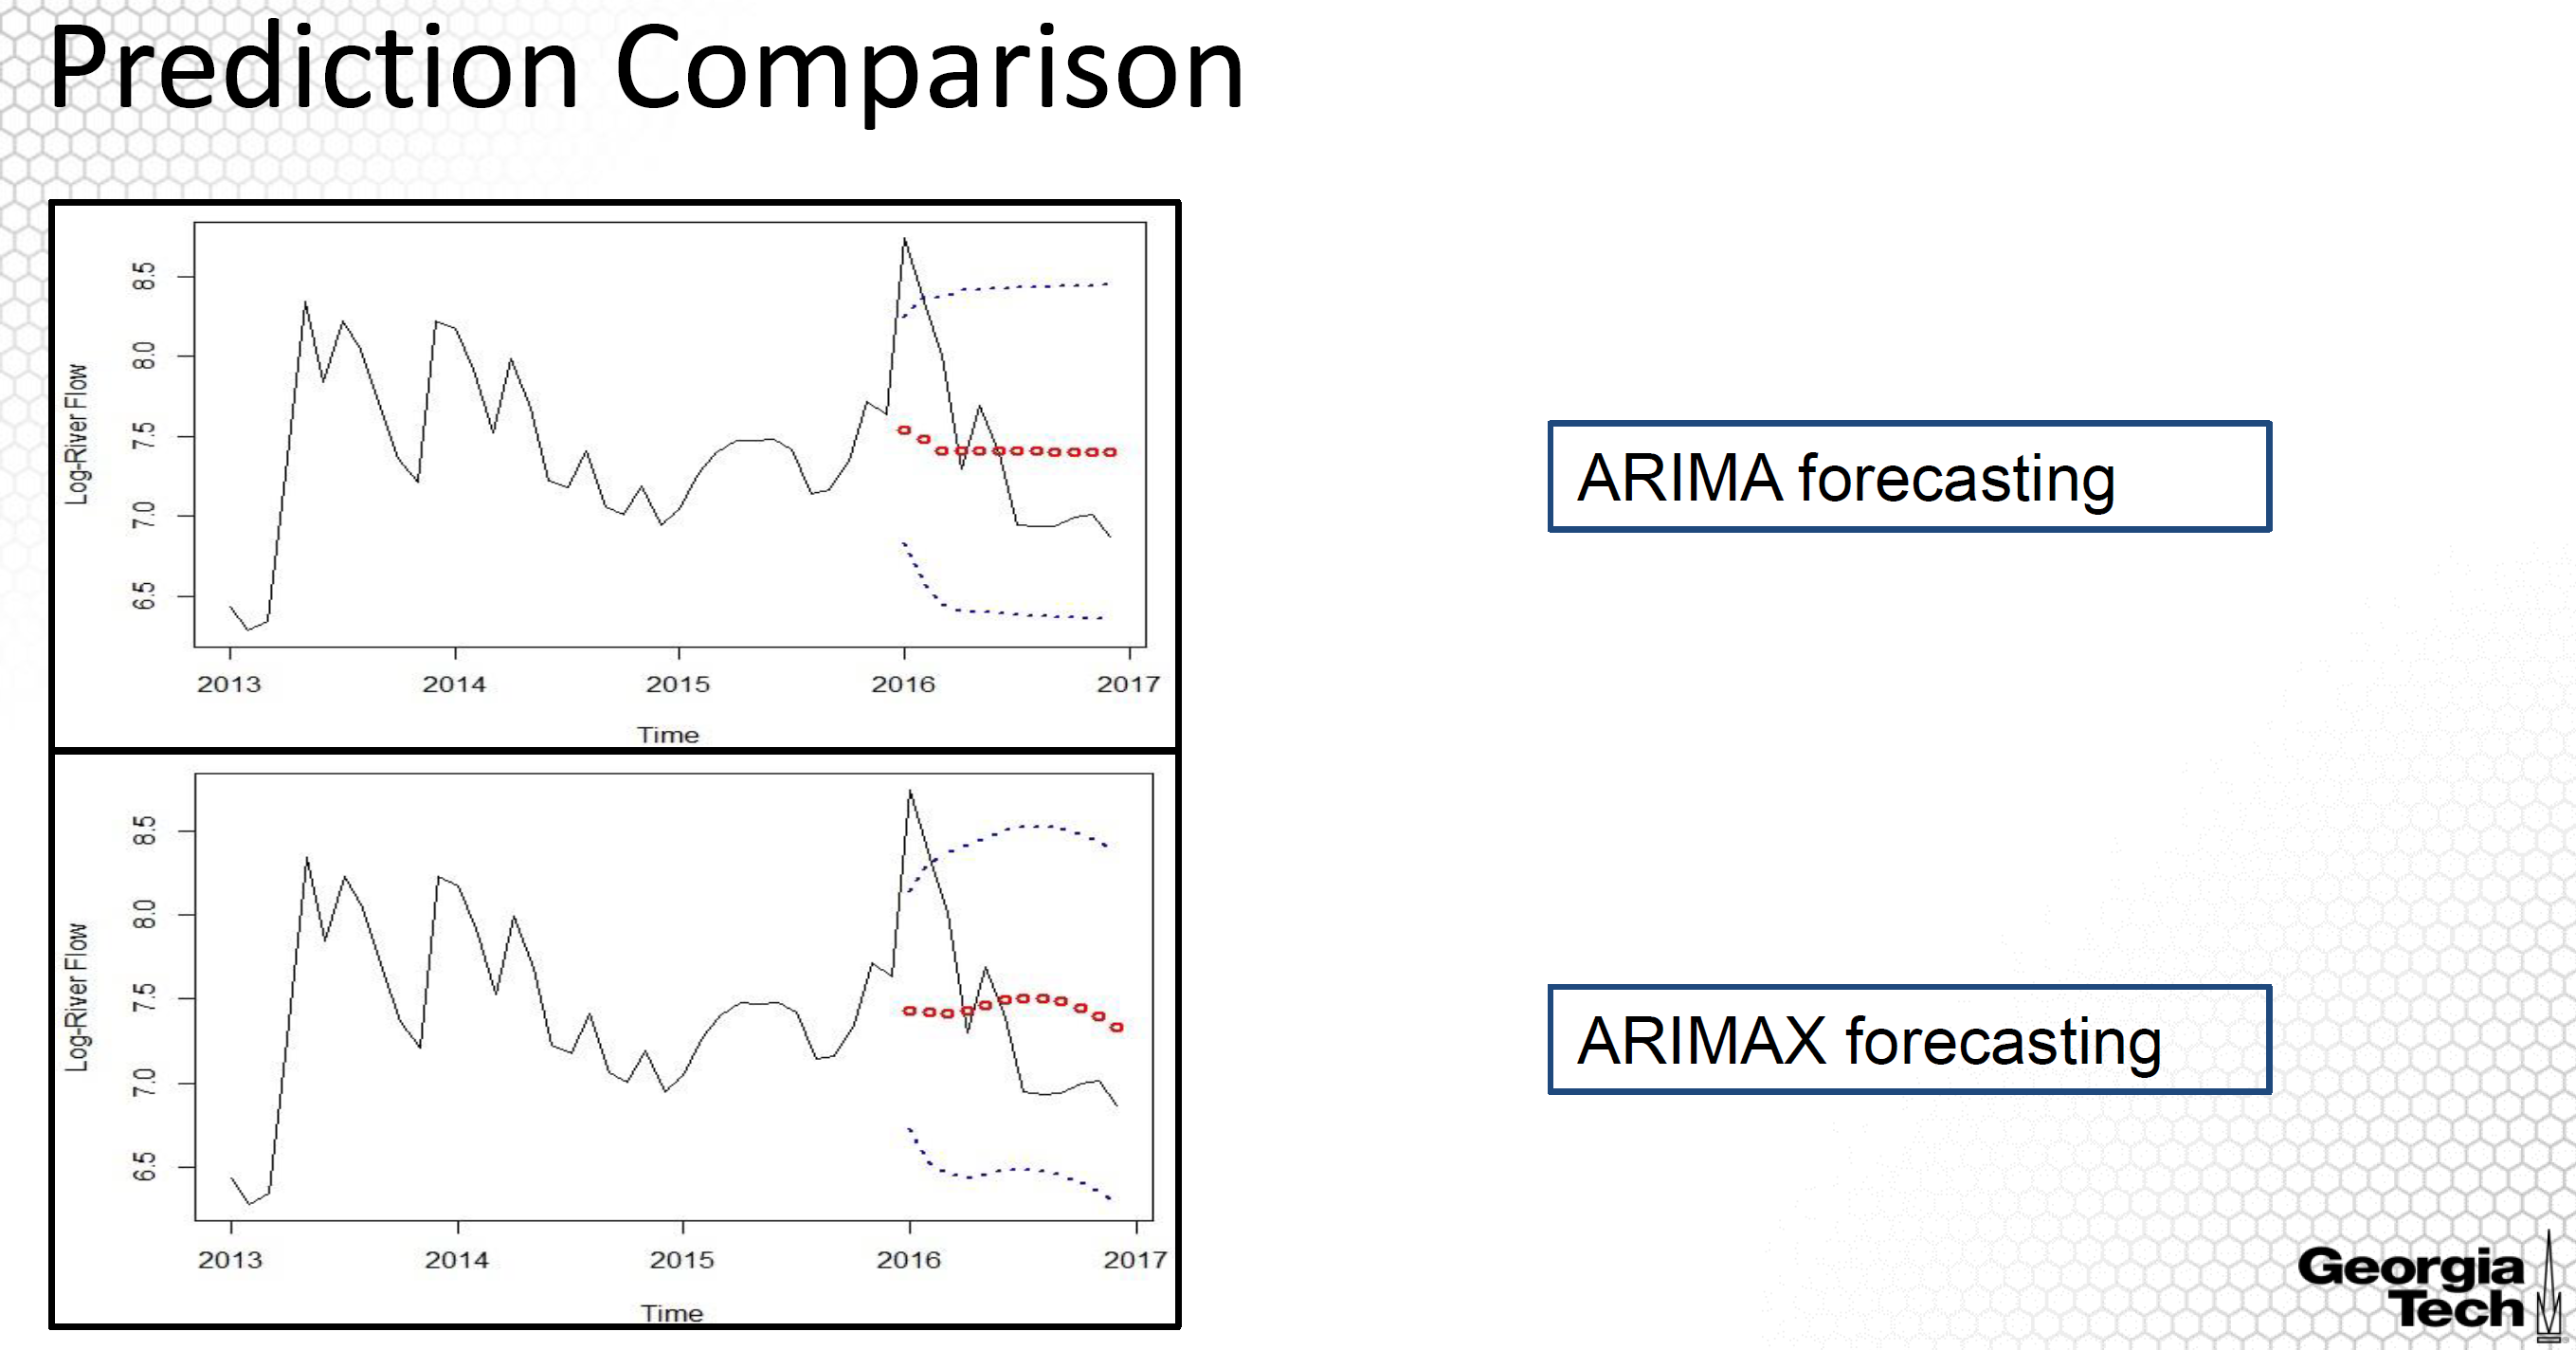


On the slide, I am comparing the predictions using the ARIMA without exogenous factors in the upper figure, and with exogenous factors in the lower figure. 

- I specified the same scale for both plots for comparison. 
- The prediction using ARIMA without exogenous factors are not better than when accounting for exogenous factors; 
- The point predictions for ARIMAX do not have as high uncertainty as when using the simpler ARIMA model.

### VAR(X) Model Fitting

The analysis on river flow data using multivariate time series modeling

**VAR Modeling**

- We will begin with the classic VAR model applied to the trivariate time series including log transformation of river flow, temperature and rainfall.
- As before we first select the order for the VAR model, which is p=1 when using the HQ criterion but p=5 when using AIC. 
- When fitting the VAR model, we consider a seasonal deterministic component specified as season=12 and 
- we assume a trend specified as type=both which means both constant and linear trend. 
- We can also further reduce the model using VAR restrict. We will next look at the outputs for river flow for both the VAR and VAR restrict.

In [25]:
#####################################################
#### Model 3: VAR model (with all three time series)
######################################################

data.train=cbind(log_river,log_temp,log_rain)
data.test=cbind(log_river2,log_temp2,log_rain2)

library(vars, warn.conflicts = FALSE)
###VAR Model##
##Model Selection
VARselect(data.train, lag.max = 20,season=12,type="both")$selection

Loading required package: MASS

Loading required package: strucchange

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: lmtest



AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      1      1      5

In [26]:
# Model Fitting: Unrestricted VAR with deterministic components
model.var=VAR(data.train, p=1,season=12,type="both")
summary(model.var)


VAR Estimation Results:
Endogenous variables: log_river, log_temp, log_rain 
Deterministic variables: both 
Sample size: 719 
Log Likelihood: 38.259 
Roots of the characteristic polynomial:
0.7405 0.1843 0.07091
Call:
VAR(y = data.train, p = 1, type = "both", season = 12L)


Estimation results for equation log_river: 
log_river = log_river.l1 + log_temp.l1 + log_rain.l1 + const + trend + sd1 + sd2 + sd3 + sd4 + sd5 + sd6 + sd7 + sd8 + sd9 + sd10 + sd11 

               Estimate Std. Error t value Pr(>|t|)    
log_river.l1  7.383e-01  2.511e-02  29.396  < 2e-16 ***
log_temp.l1  -8.597e-02  2.279e-01  -0.377 0.706155    
log_rain.l1   6.787e-02  2.053e-02   3.306 0.000995 ***
const         2.233e+00  9.692e-01   2.304 0.021541 *  
trend        -7.753e-05  6.698e-05  -1.157 0.247481    
sd1           1.074e-01  7.577e-02   1.418 0.156678    
sd2           8.888e-02  8.406e-02   1.057 0.290725    
sd3           1.773e-01  7.371e-02   2.405 0.016426 *  
sd4           2.301e-01  6.609e-02  

**VAR Modeling: Output for River Flow**

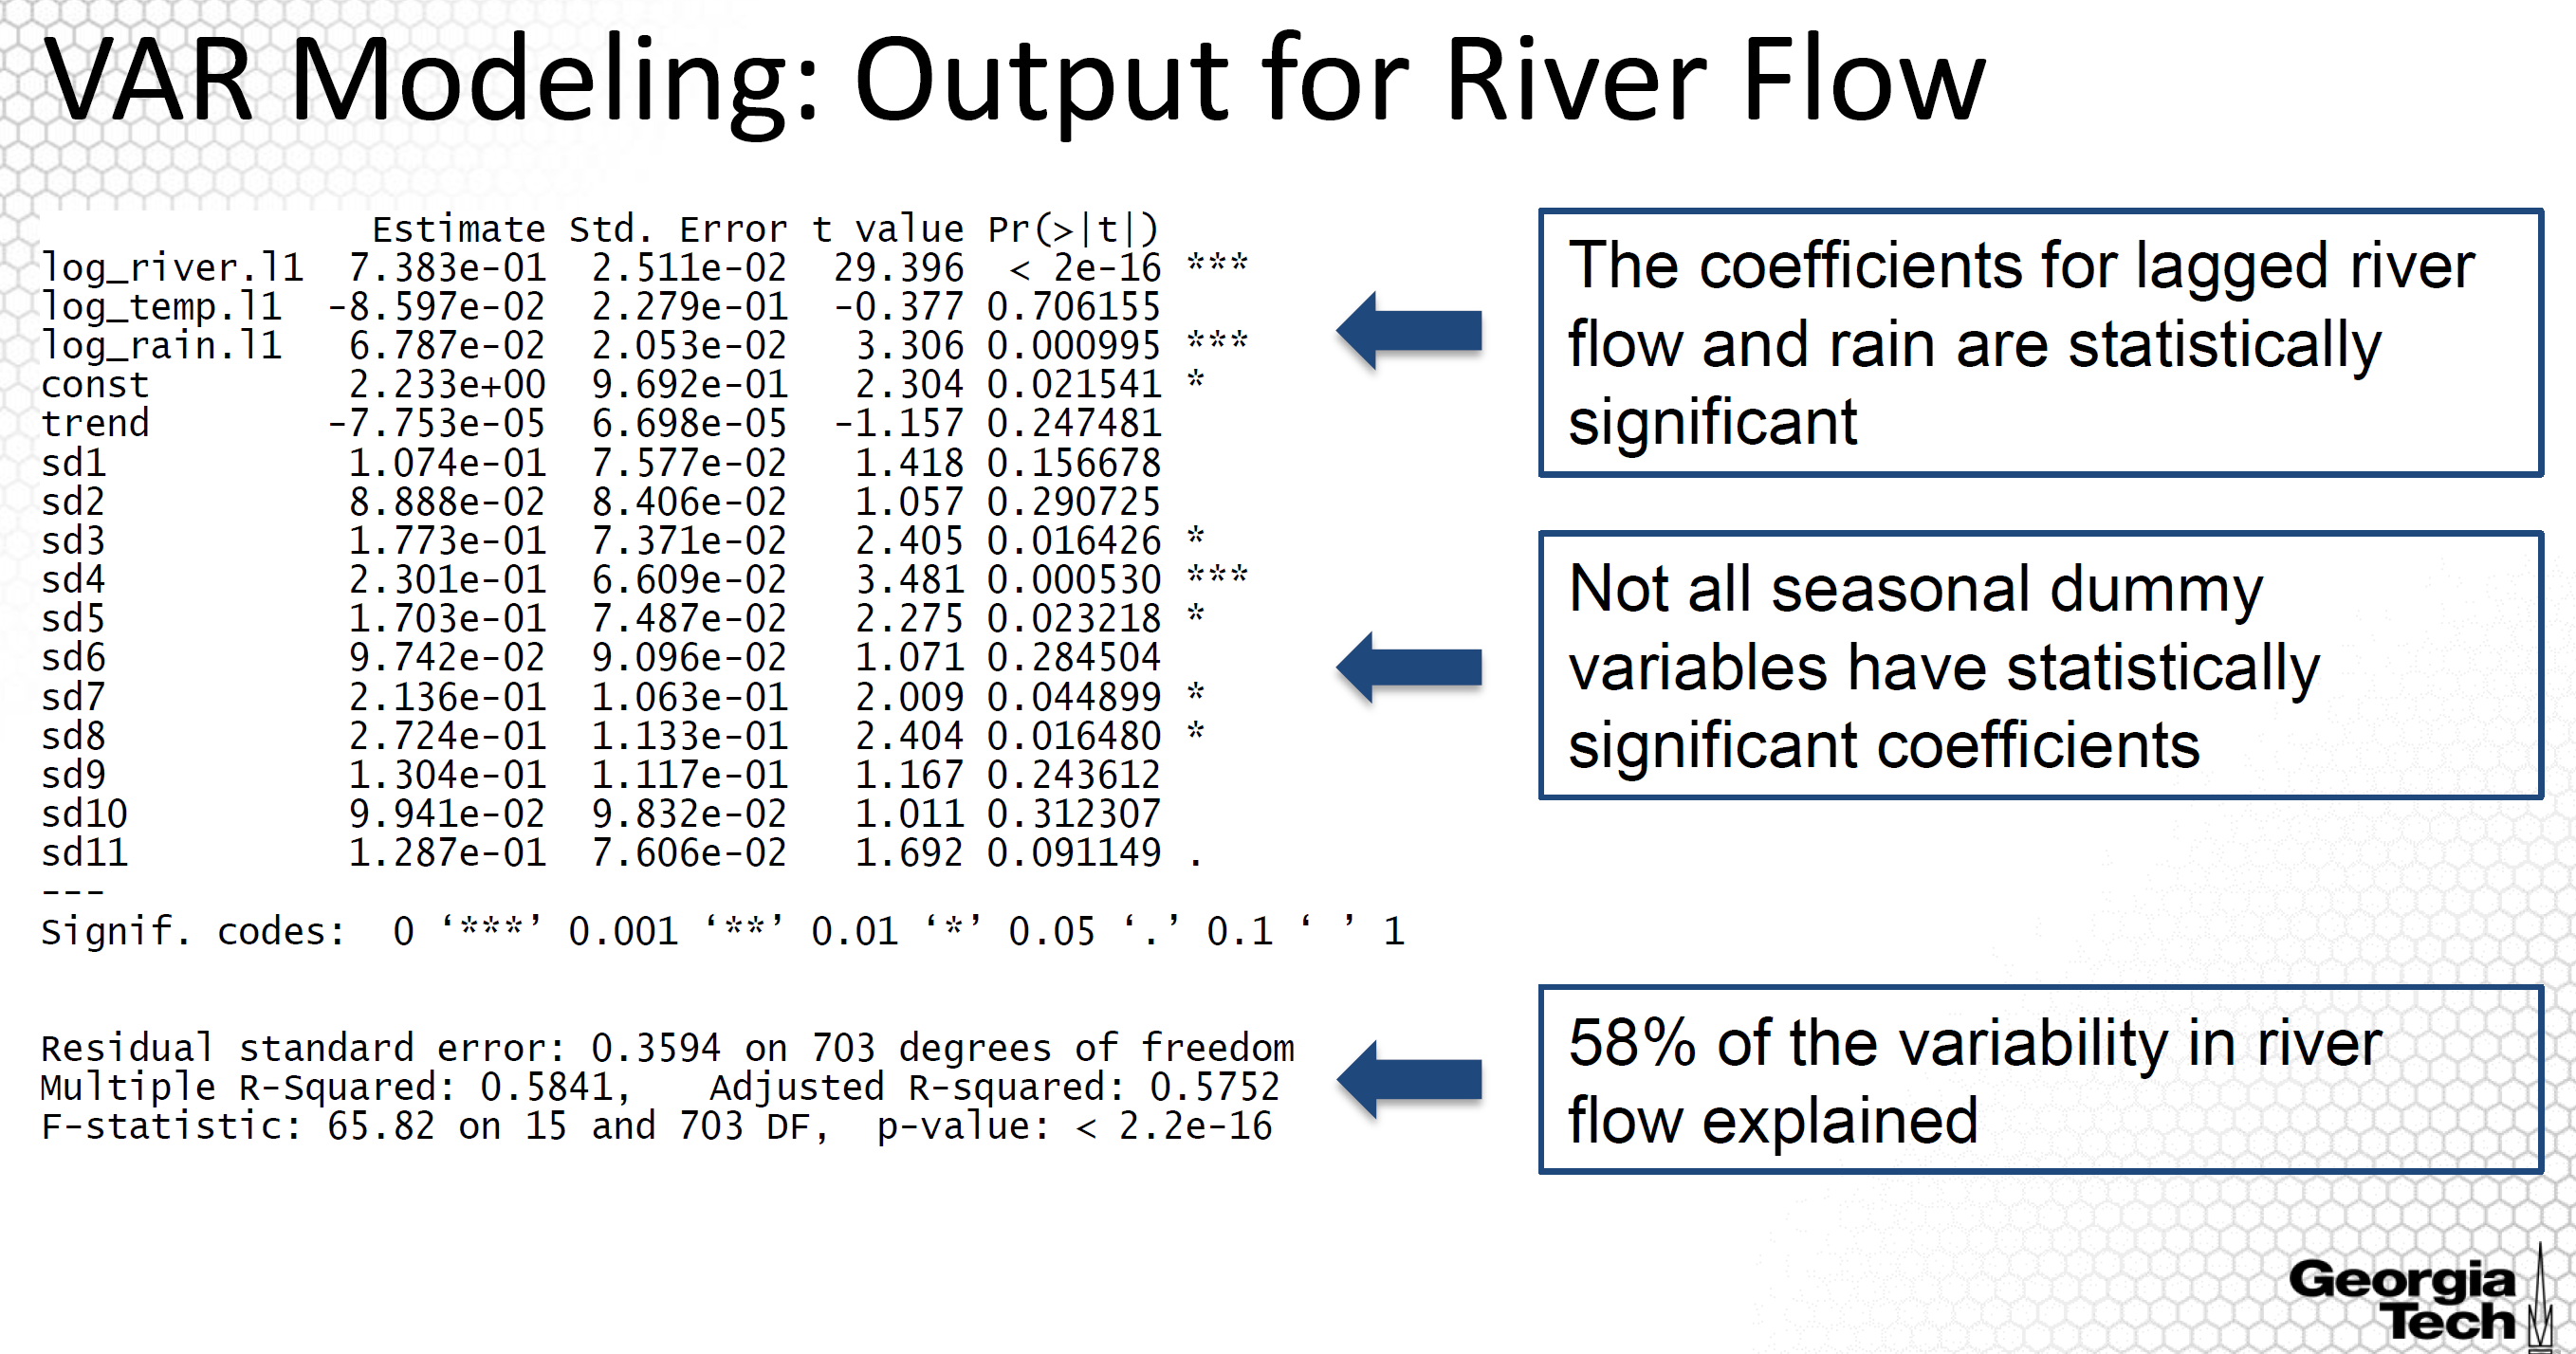

This is the output from the VAR model for modeling the river flow time series. 

- The first three lines are for the coefficients for the lag 1 time series, 
- the next coefficients are for the constant and for the trend; and 
- the last 11 coefficients are for modeling seasonality where the baseline is December or sd12. 

Similar to modeling monthly seasonality using dummy variables as introduced in the first lessons of this course, we only include 11 of the 12 dummy variables because the dummy variables are linearly dependent when also having an intercept in the model. What can we learn from this output?

First, the coefficients for lagged river flow and rain are statistically significant. 

Second, the coefficient corresponding to trend is not statistically significant given than all other factors modeling seasonality and serial correlation are included in the model. Among the seasonality dummy variables, some of the coefficients are statistically significant some are not.

Last, the R-square of the model is about 0.57, or if we would use the interpretation from linear regression analysis, 58% of the variability in the response is explained by the predicting variables included in the model.

**Restricted VAR Output**

In [27]:
## Model Fitting: Restricted VAR
model.var.restrict=restrict(model.var)  
summary(model.var.restrict)


VAR Estimation Results:
Endogenous variables: log_river, log_temp, log_rain 
Deterministic variables: both 
Sample size: 719 
Log Likelihood: 22.286 
Roots of the characteristic polynomial:
0.7405 0.2026 0.01255
Call:
VAR(y = data.train, p = 1, type = "both", season = 12L)


Estimation results for equation log_river: 
log_river = log_river.l1 + log_rain.l1 + const + sd4 + sd8 

             Estimate Std. Error t value Pr(>|t|)    
log_river.l1  0.74053    0.02440  30.353  < 2e-16 ***
log_rain.l1   0.07221    0.02000   3.610 0.000328 ***
const         1.82980    0.18147  10.083  < 2e-16 ***
sd4           0.11653    0.04941   2.358 0.018625 *  
sd8           0.12510    0.04904   2.551 0.010953 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.3605 on 714 degrees of freedom
Multiple R-Squared: 0.9977,	Adjusted R-squared: 0.9976 
F-statistic: 6.067e+04 on 5 and 714 DF,  p-value: < 2.2e-16 


Estimation results for equation log_temp: 
log_t

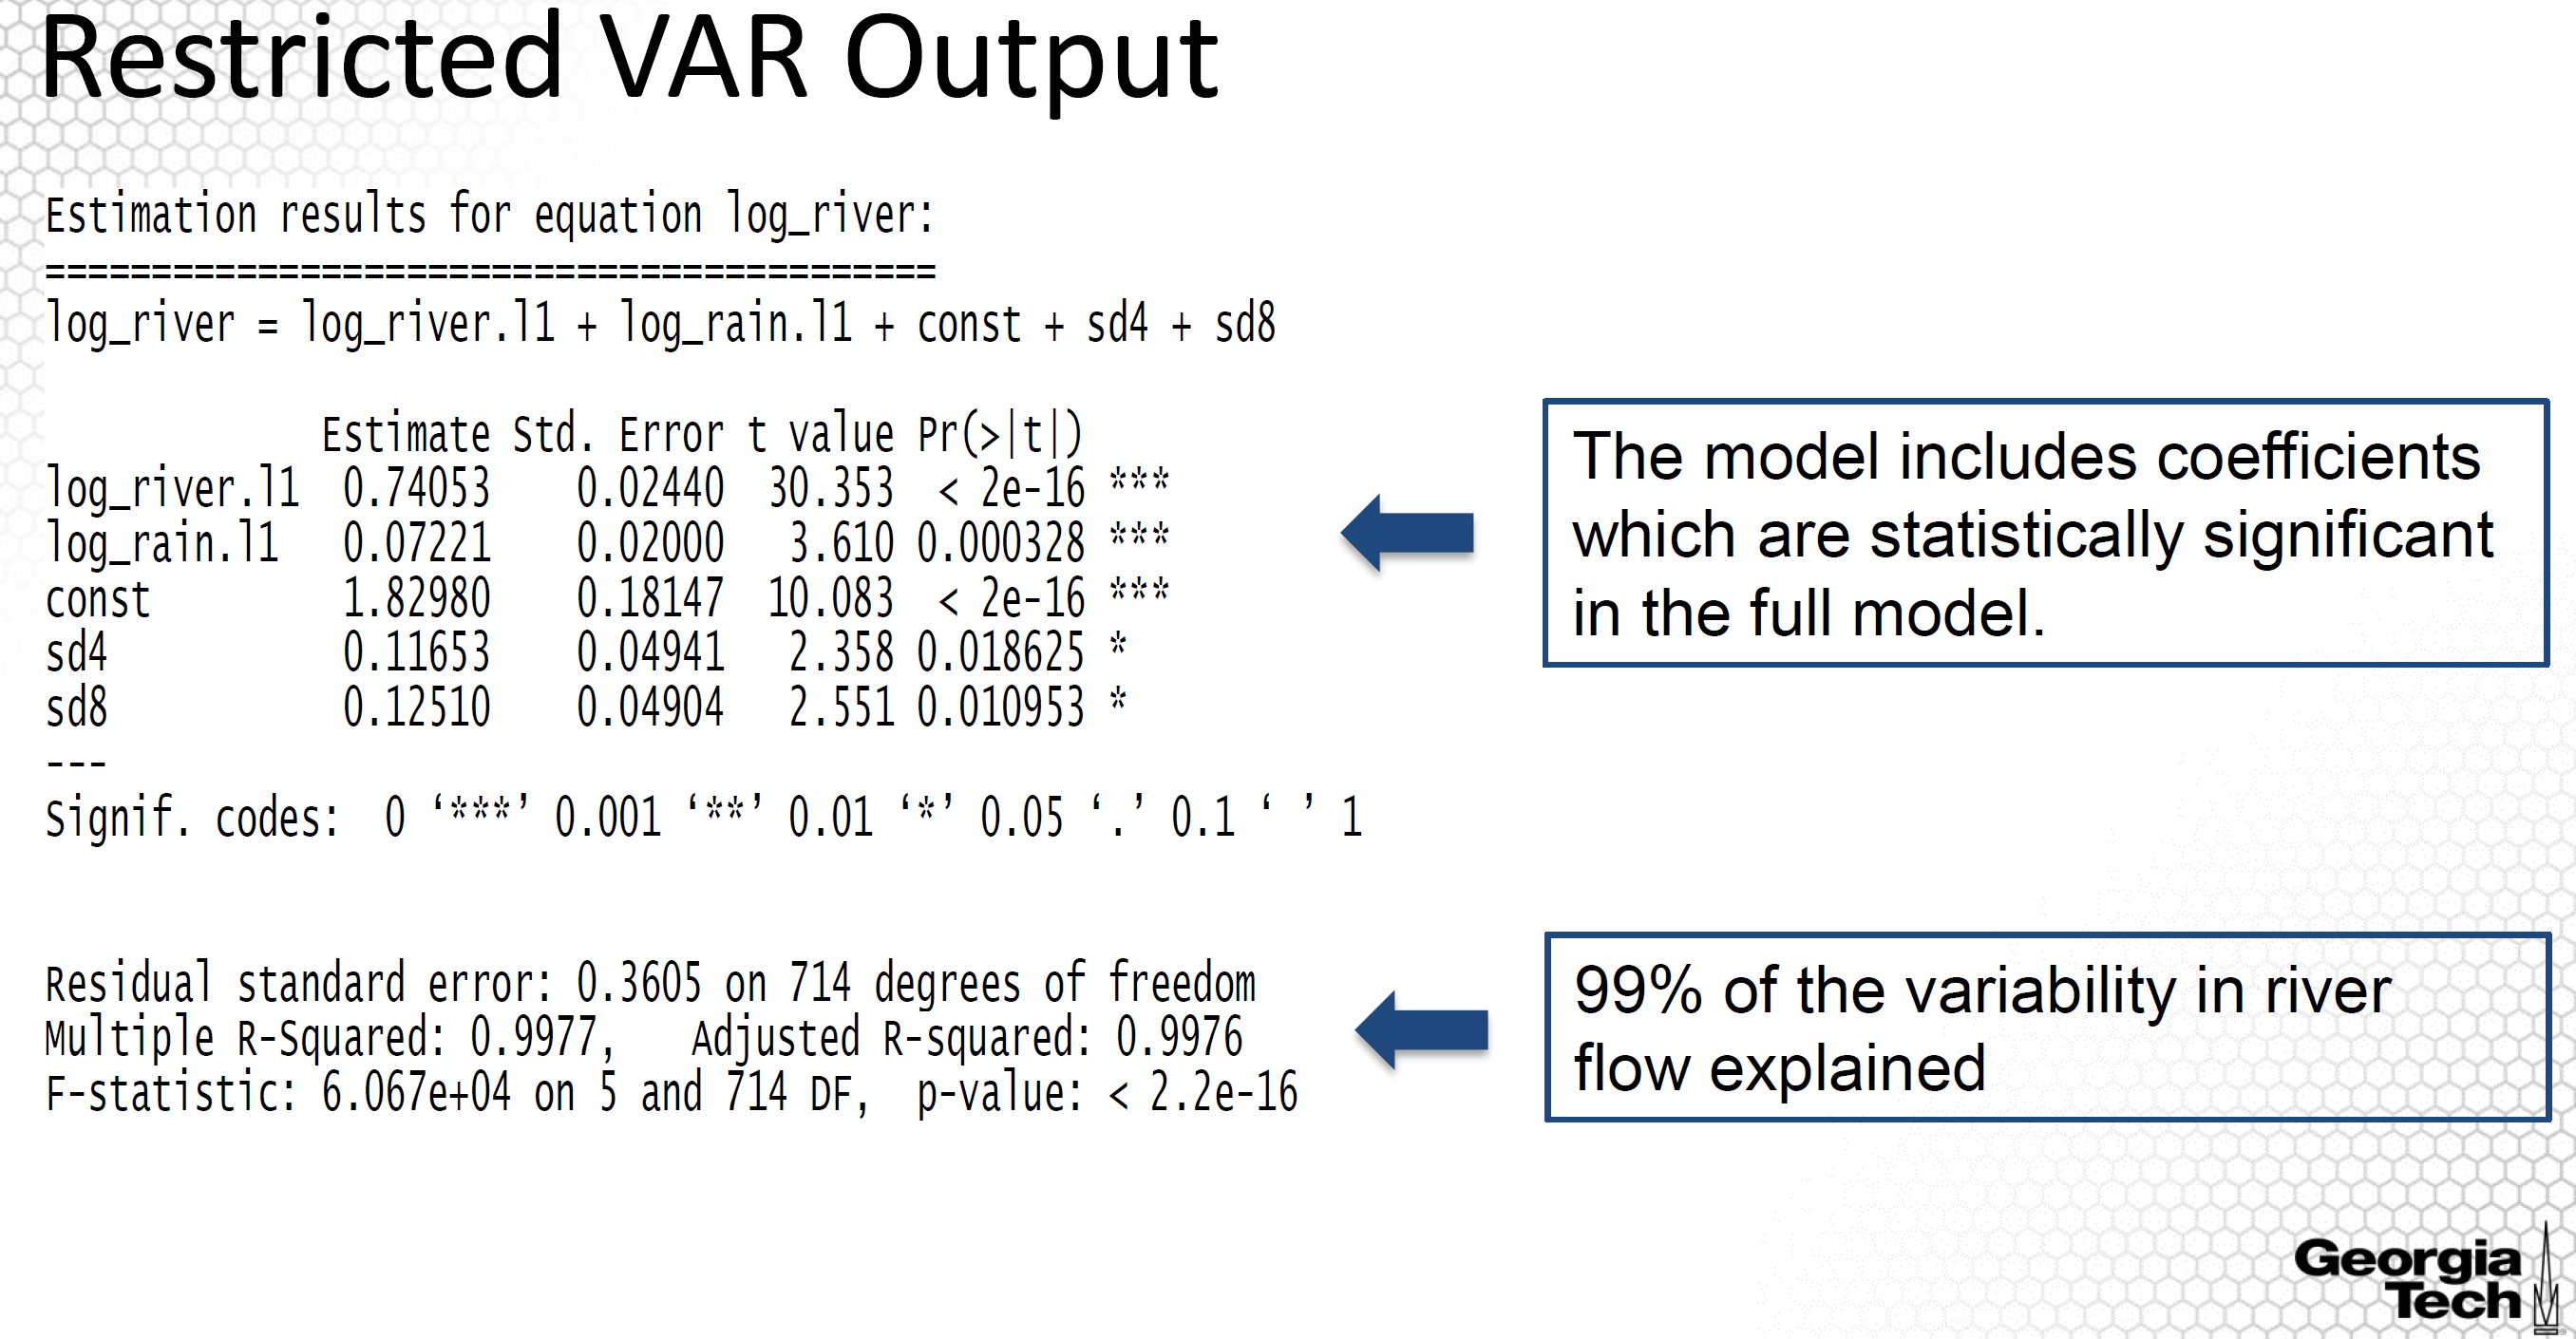


On the slide is the output from the restricted VAR model for modeling river flow time series. 

**I will note that restrict VAR simply drops those coefficients which are not statistically significant, which is not the correct way to perform model selection** since as you learned in regression analysis, when removing one predicting variable, the statistical significance can be very different from the model including the predicting variable. To understand this concept, I recommend learning about Variable selection from the Online Regression Analysis course.

Based on this model, we can see that the R-squared has increased significantly to 99%. This is much higher than the full model; there are two things that you need to remember. 

**The interpretation of the R-squared applies under the assumption that the response data are independent, which is not the case in fitting linear models to time series. This could explain why the R-squared has increased for a smaller number of predicting variables vs the full model.**

**Granger Causality**

Does temperature and rainfall Granger cause river flow?

In [28]:
## Granger Causality: Wald Test
library(aod, warn.conflicts = FALSE)

coef.riverflow = coefficients(model.var)$log_river[-4,1]
var.model = vcov(model.var)[2:16,2:16]

## Granger Causality: Lead Rain & Temperature onto River Flow
wald.test(b=coef.riverflow, var.model, Terms=c(2,3))

Wald test:
----------

Chi-squared test:
X2 = 11.3, df = 2, P(> X2) = 0.0035

Here is the output of performing the **Wald test for the null hypothesis that all coefficients corresponding to the lag-1 of the two time series are zero vs the alternative that at least one is not zero.**

Based on this test, the **p-value is small, hence we reject the null hypothesis. This says that at least one of the time series Granger cause river flow.**

In [29]:
coef.temp = coefficients(model.var)$log_temp[-4,1]
var.model = vcov(model.var)[18:32,18:32]

## Granger Causality: Lag Temperature onto River Flow
wald.test(b=coef.temp, var.model, Terms=c(1))

Wald test:
----------

Chi-squared test:
X2 = 4.0, df = 1, P(> X2) = 0.046

In [30]:
coef.rain = coefficients(model.var)$log_rain[-4,1]
var.model = vcov(model.var)[34:48,34:48]

## Granger Causality: Lag Rain onto River Flow
wald.test(b=coef.rain, var.model, Terms=c(1))

Wald test:
----------

Chi-squared test:
X2 = 0.12, df = 1, P(> X2) = 0.73

**Prediction**

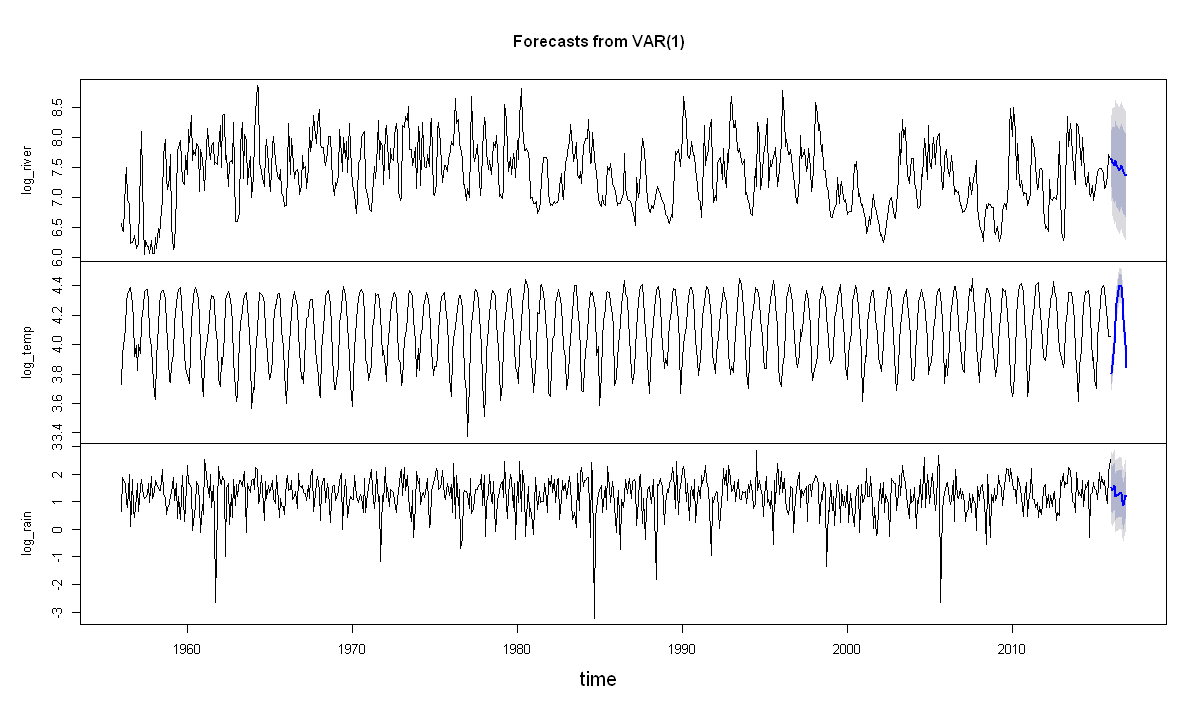

In [31]:
fore3 = forecast(model.var.restrict,h=12)
plot(fore3)

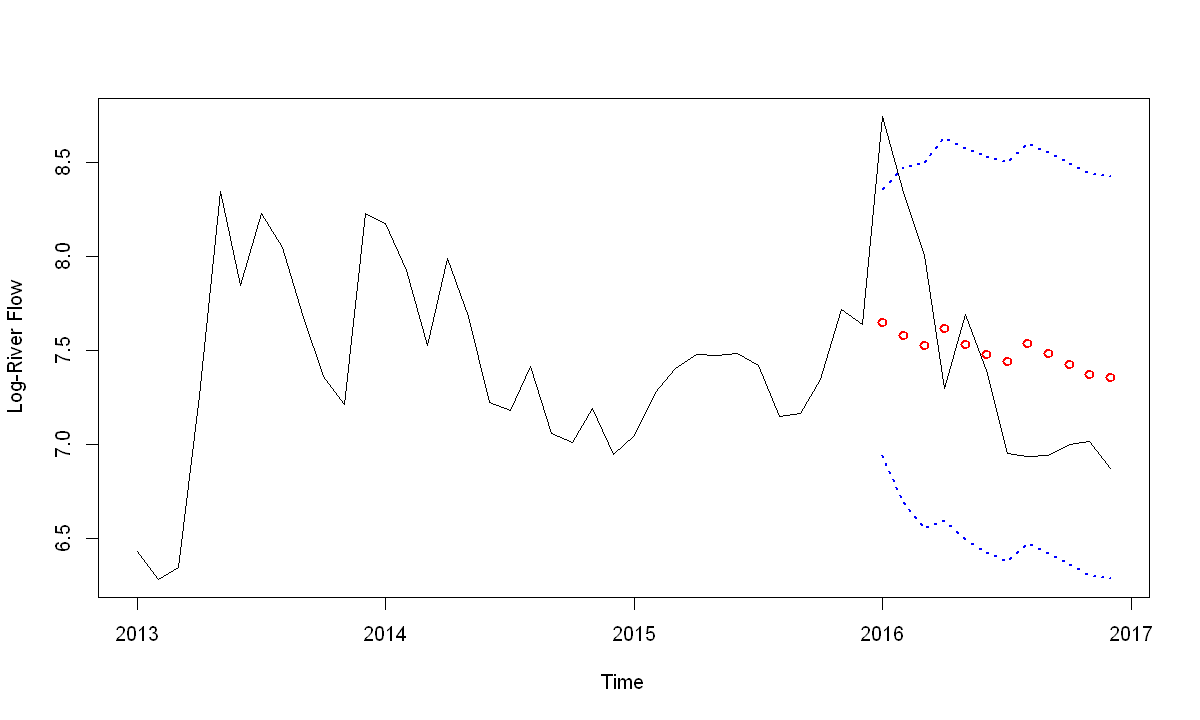

In [32]:
## Consider only forecasts for river flow for comparison
fore3 = fore3$forecast$log_river
fore3=as.data.frame(fore3)
#fore3

point.fore3 = ts(fore3[,1],start=2016, freq=12)
lo.fore3 = ts(fore3[,4],start=2016, freq=12)
up.fore3 = ts(fore3[,5],start=2016, freq=12)
part_log_river = ts(log(river[(n-47):n]),start=2013, freq=12)

ymin=min(c(part_log_river,lo.fore3))
ymax=max(c(part_log_river,up.fore3))

par(mfrow=c(1,1))
plot(part_log_river, ylim=c(ymin,ymax), ylab="Log-River Flow", type="l",main="")
points(point.fore3,lwd=2,col="red")
lines(lo.fore3,lty=3,lwd= 2, col="blue")
lines(up.fore3,lty=3,lwd= 2, col="blue")

**VARX Modeling**

Next, I will illustrate the implementation of the VARX model, in which I fit a VAR model to the bivariate time series including log transformation of river flow. 

- The difference between this model and the more general VAR fitted in the previous slides is that this VARX model considers temperature as exogeneous factor where the more general VAR considers temperature as endogenous. 
- In both models, rain is endogenous. 
- This implementation is used only to illustrate VARX. The implementation is using the VAR() R command with similar inputs as before except that this time I am including another option in the VAR function, specifying the exogen equal to temperature. The rest of the implementation is just like the VAR model.

In [33]:
#####################################################
#### Model 4: VARX model (with temperature exogeneous)
######################################################
##Model Selection
VARselect(cbind(log_river,log_rain), lag.max = 20,season=12,exogen=data.frame(log_temp))$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     5      1      1      5

In [34]:
## Model Fitting: Unrestricted VAR
model.var2=VAR(cbind(log_river,log_rain), p=1,season=12,exogen=data.frame(log_temp))
summary(model.var2)


VAR Estimation Results:
Endogenous variables: log_river, log_rain 
Deterministic variables: const 
Sample size: 719 
Log Likelihood: -990.768 
Roots of the characteristic polynomial:
0.7402 0.03984
Call:
VAR(y = cbind(log_river, log_rain), p = 1, season = 12L, exogen = data.frame(log_temp))


Estimation results for equation log_river: 
log_river = log_river.l1 + log_rain.l1 + const + sd1 + sd2 + sd3 + sd4 + sd5 + sd6 + sd7 + sd8 + sd9 + sd10 + sd11 + log_temp 

             Estimate Std. Error t value Pr(>|t|)    
log_river.l1  0.73996    0.02498  29.625  < 2e-16 ***
log_rain.l1   0.06636    0.02057   3.226  0.00131 ** 
const         2.77047    0.94314   2.937  0.00342 ** 
sd1           0.10593    0.06788   1.561  0.11906    
sd2           0.11253    0.06587   1.708  0.08799 .  
sd3           0.22855    0.07522   3.038  0.00247 ** 
sd4           0.30151    0.09591   3.144  0.00174 ** 
sd5           0.25520    0.11581   2.204  0.02787 *  
sd6           0.19300    0.13302   1.451  0.147

**VARX Modeling Output**

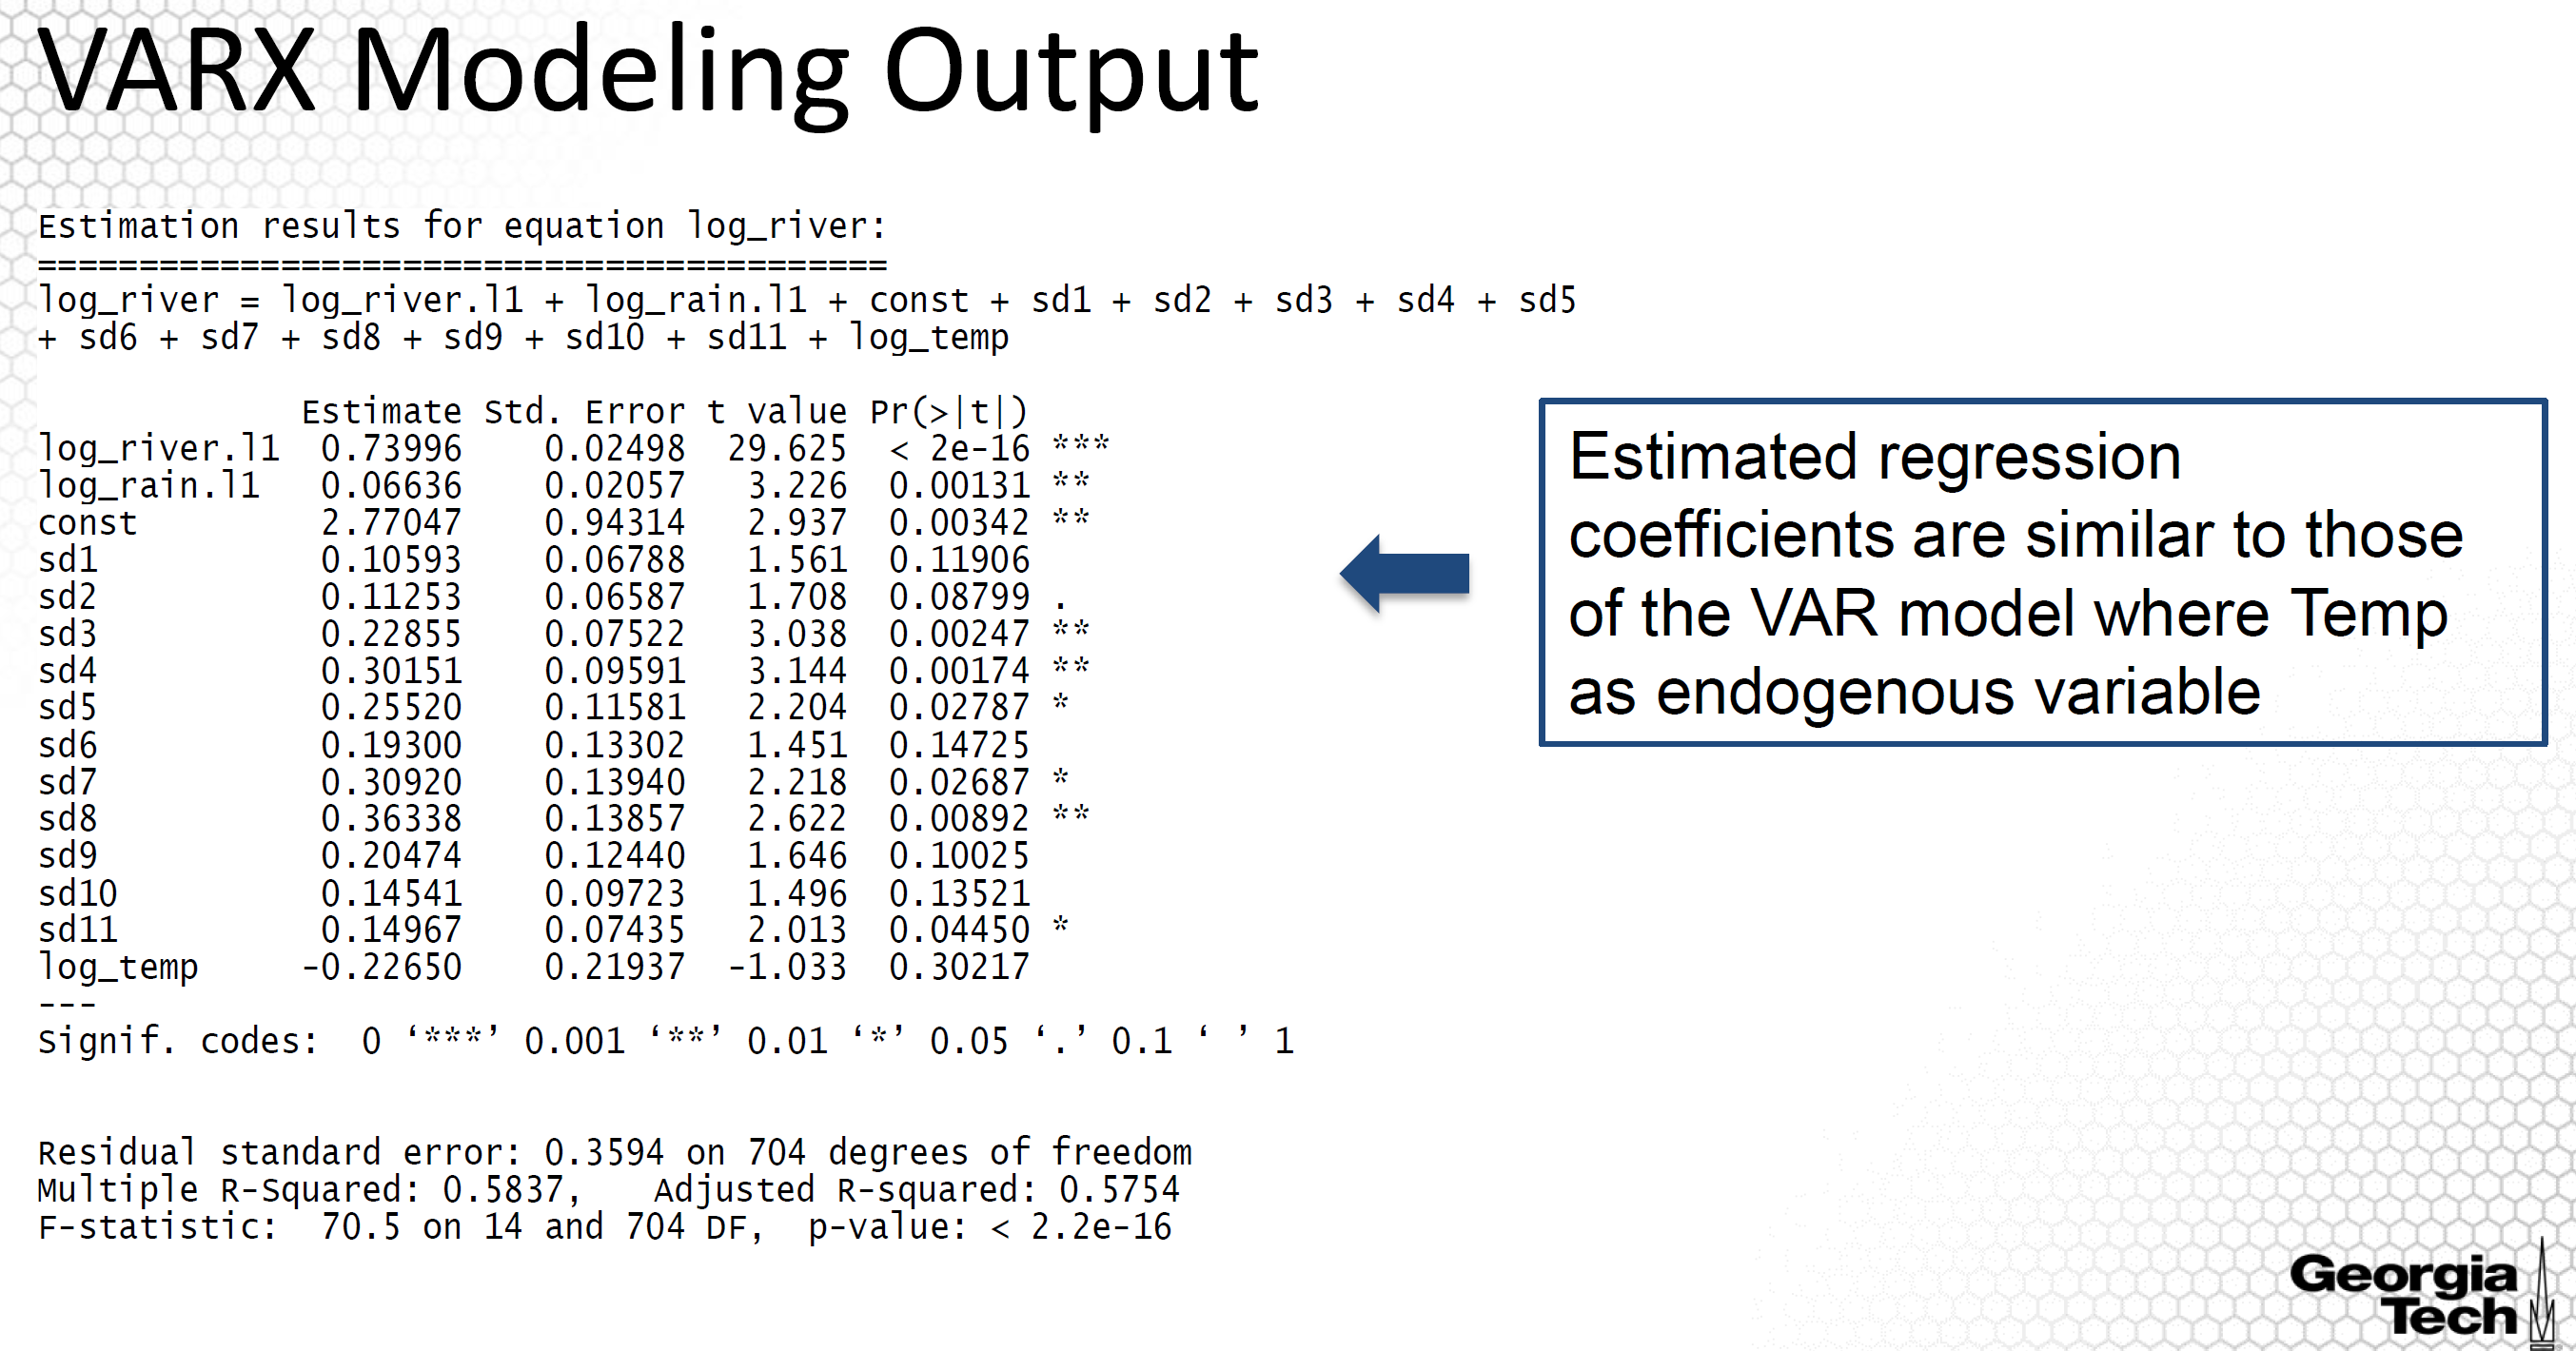


This is output of the VARX model for the river flow, which now includes a last row corresponding to temperature. The regression coefficient for temperature as an exogenous variable is not statistically significant given that we accounted for seasonality, trend and serial correlation in the river flow modeling. 

Importantly, the estimated coefficients based on this model are similar to those from the model where temp is an endogenous variable.

In [35]:
## Model Fitting: Restricted VAR
model.var.restrict2=restrict(model.var2)  
summary(model.var.restrict2)


VAR Estimation Results:
Endogenous variables: log_river, log_rain 
Deterministic variables: const 
Sample size: 719 
Log Likelihood: -1001.261 
Roots of the characteristic polynomial:
0.7405     0
Call:
VAR(y = cbind(log_river, log_rain), p = 1, season = 12L, exogen = data.frame(log_temp))


Estimation results for equation log_river: 
log_river = log_river.l1 + log_rain.l1 + const + sd4 + sd8 

             Estimate Std. Error t value Pr(>|t|)    
log_river.l1  0.74053    0.02440  30.353  < 2e-16 ***
log_rain.l1   0.07221    0.02000   3.610 0.000328 ***
const         1.82980    0.18147  10.083  < 2e-16 ***
sd4           0.11653    0.04941   2.358 0.018625 *  
sd8           0.12510    0.04904   2.551 0.010953 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


Residual standard error: 0.3605 on 714 degrees of freedom
Multiple R-Squared: 0.9977,	Adjusted R-squared: 0.9976 
F-statistic: 6.067e+04 on 5 and 714 DF,  p-value: < 2.2e-16 


Estimation results for equation

$log_river
          fcst    lower    upper        CI
 [1,] 7.647715 6.941098 8.354331 0.7066161
 [2,] 7.573801 6.685220 8.462383 0.8885815
 [3,] 7.514326 6.540285 8.488368 0.9740416
 [4,] 7.599888 6.582023 8.617753 1.0178649
 [5,] 7.523811 6.482697 8.564925 1.0411140
 [6,] 7.463820 6.410174 8.517465 1.0536456
 [7,] 7.414798 6.354343 8.475253 1.0604549
 [8,] 7.525978 6.461807 8.590148 1.0641705
 [9,] 7.460095 6.393893 8.526298 1.0662026
[10,] 7.413010 6.345695 8.480326 1.0673153
[11,] 7.356795 6.288869 8.424720 1.0679251
[12,] 7.346776 6.278517 8.415036 1.0682593

$log_rain
           fcst       lower    upper       CI
 [1,] 1.3955202  0.10128121 2.689759 1.294239
 [2,] 1.3298888  0.03564976 2.624128 1.294239
 [3,] 1.5109274  0.21668839 2.805166 1.294239
 [4,] 1.1937189 -0.10052014 2.487958 1.294239
 [5,] 1.1431128 -0.15112622 2.437352 1.294239
 [6,] 1.0794606 -0.21477840 2.373700 1.294239
 [7,] 1.3894621  0.09522307 2.683701 1.294239
 [8,] 1.0693190 -0.22492005 2.363558 1.294239
 [9,]

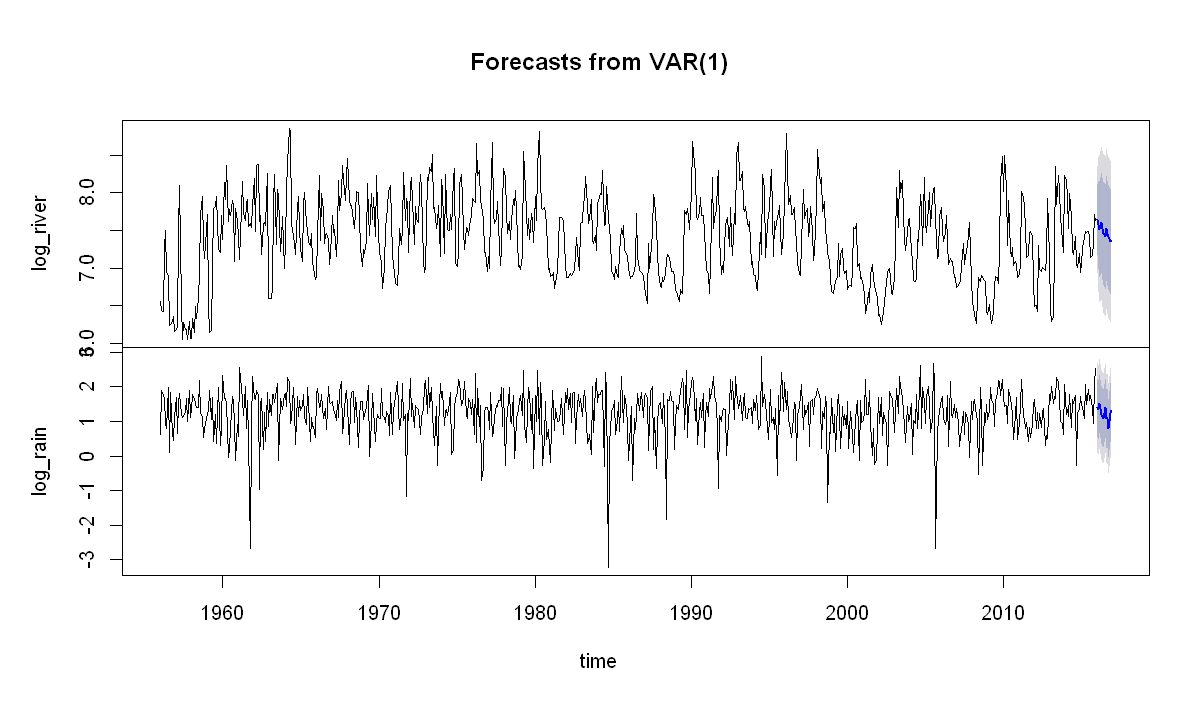

In [36]:
x=data.frame(log_temp2); colnames(x)="log_temp"
predict(model.var.restrict2, n.ahead=12, ci=0.95,dumvar=x)
fcst = forecast(model.var.restrict2,h=12,dumvar=x)
plot(fcst)

**Compare Predictions**

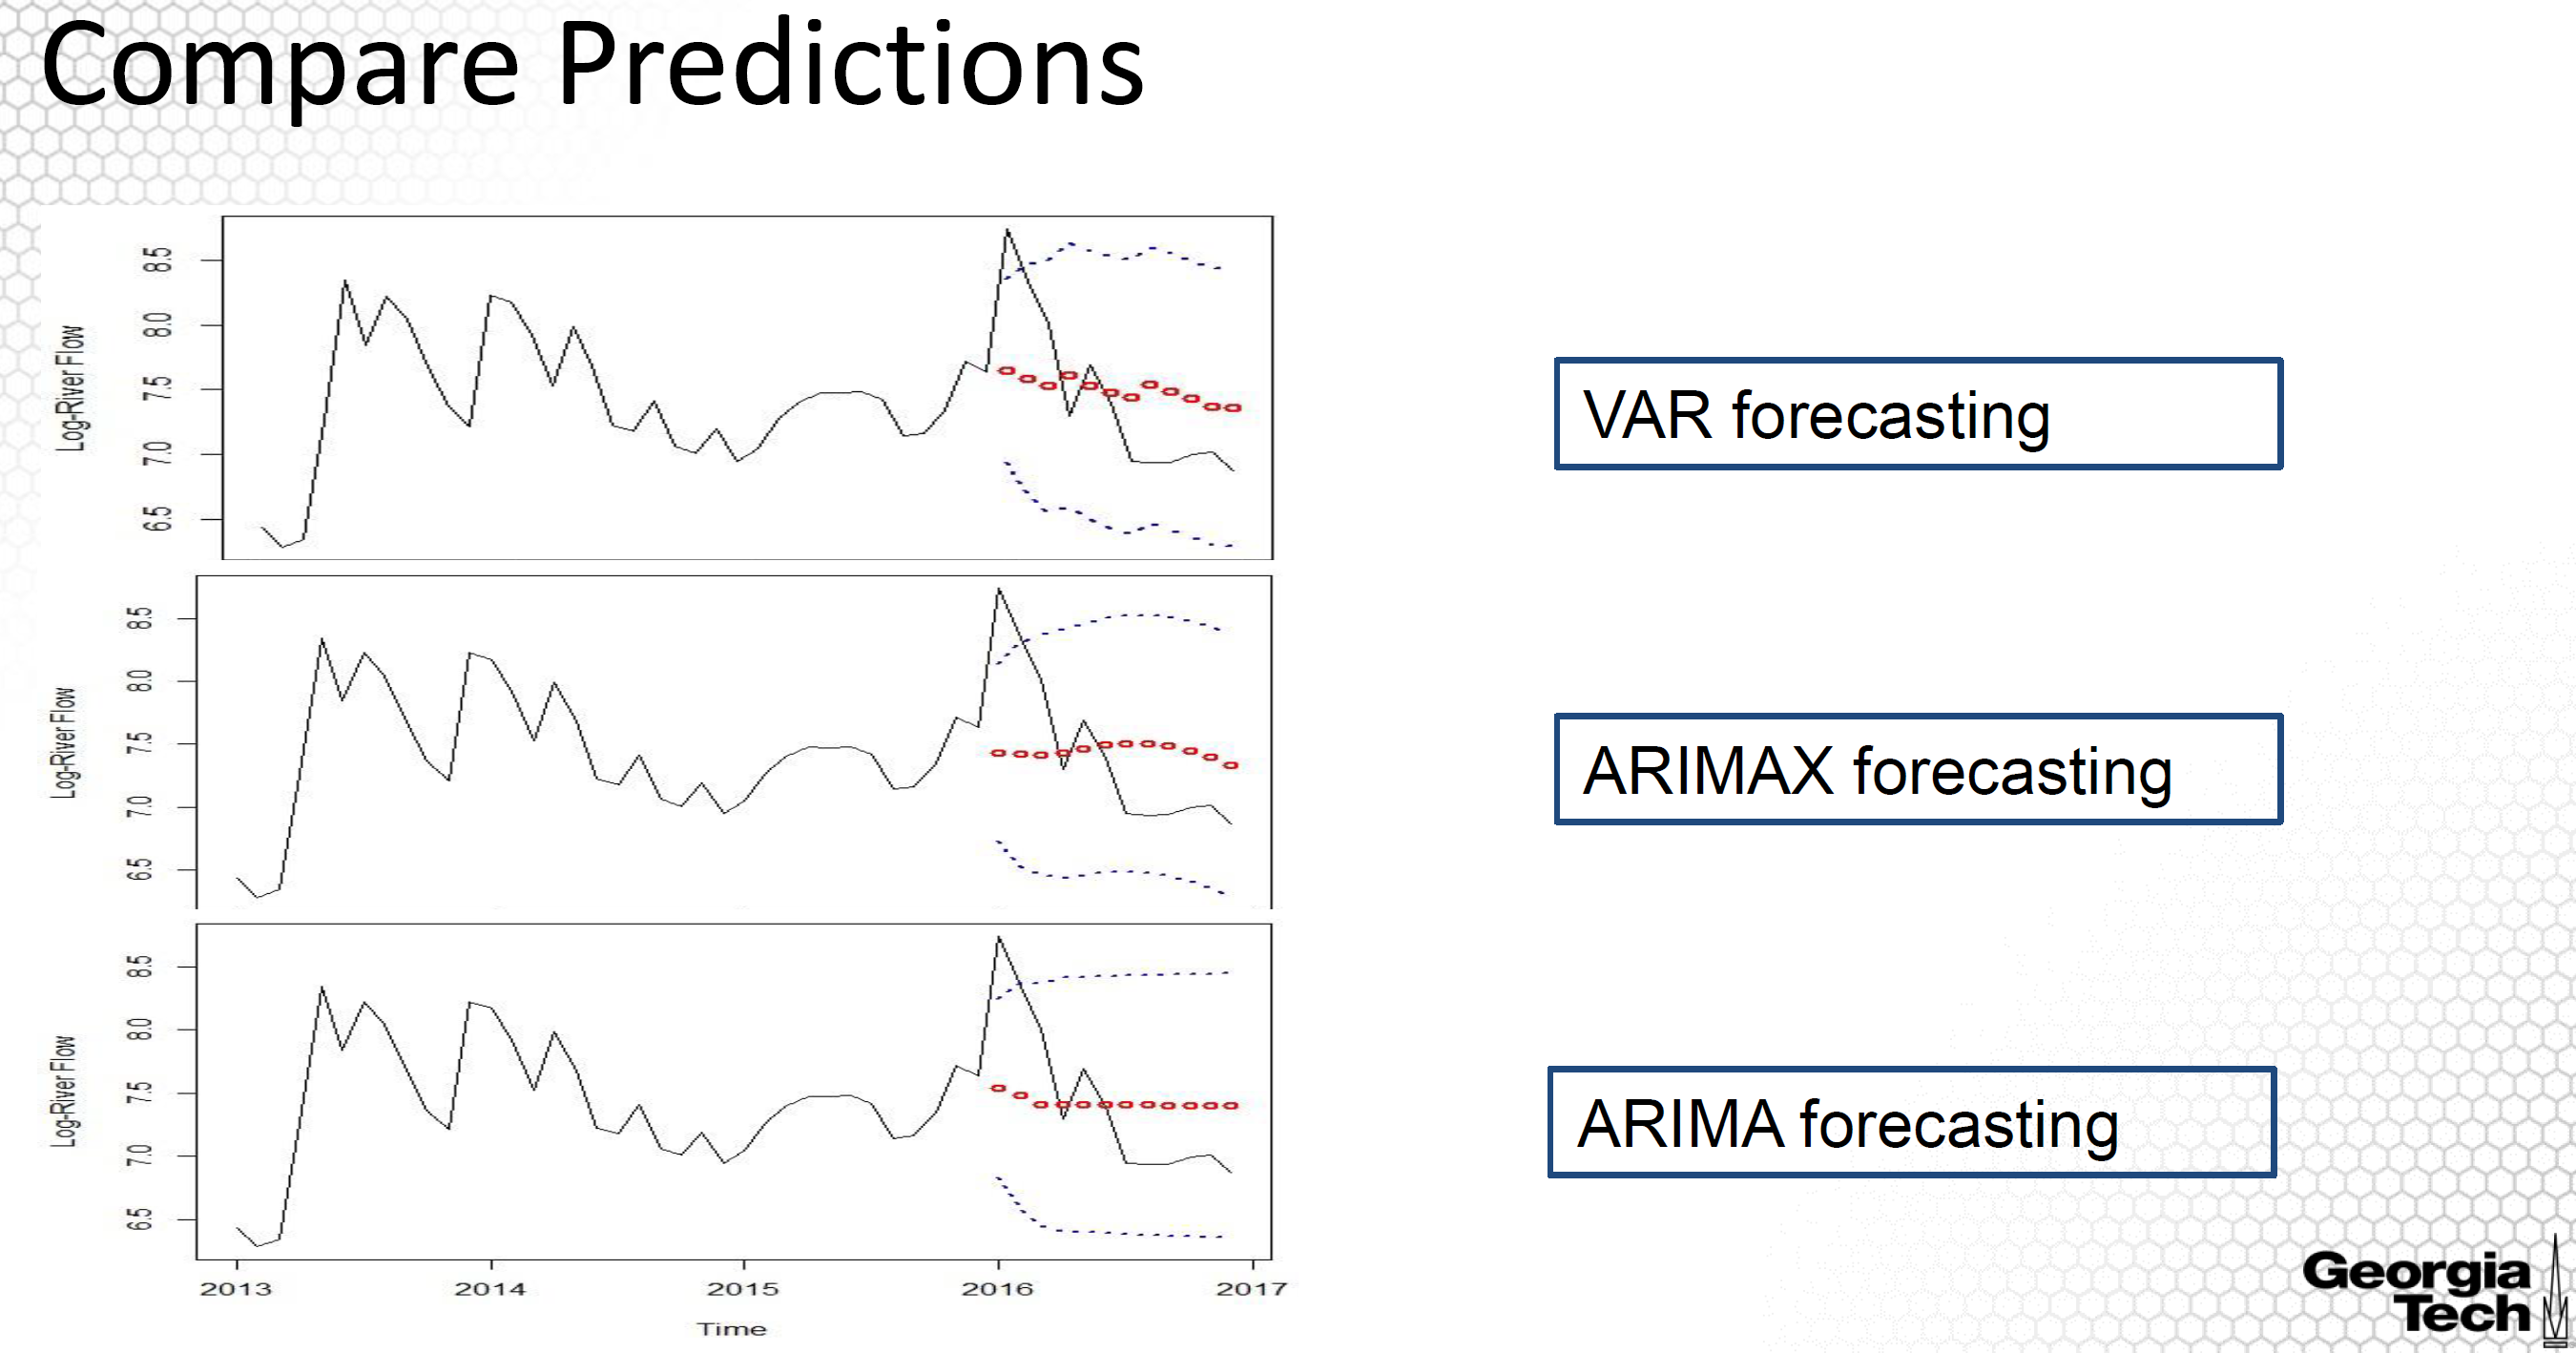


In this slide I am comparing the prediction of log river flow based on the three models, VAR, ARIMA and ARIMAX. 

- Based on this comparison, ARIMAX and VAR perform similarly, capturing a decreasing trend whereas the ARMA model predicts a flat trend. 
- This is because ARIMAX accounts for lag relationships of temperature and rainfall. 
- ARIMA does have less uncertainty, however, none of the prediction confidence bands include the observed values in January 2016, pointing to the fact that this month may have been an unusually high river flow.

**End**